<a href="https://colab.research.google.com/github/everythingapplejj/Research-Graph-Embeddings-/blob/JJ/mcmc_samples_with_Data_cleaning_beta_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [183]:
# this program is with the pre_data cleaning :)
# Duplicated nodes from the node_list and adj_matrix will be removed
# This google colab includes the methodology for graph embeddings. And removing the subgraphs.

In [215]:
accuracy_collector = []

In [185]:
print("Welcome to Graph Embeddings!")

Welcome to Graph Embeddings!


In [501]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#testing visualization
#Implementation by Jiwoong Jung
import torch

#placeholder values:

# Print information about the dataset


# Visualization
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 24})
from torch_geometric.utils import to_networkx
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
"""
Created on Wed Aug 23 12:22:38 2023

@author: vishalr
"""

# we can use the node labels for the first set of the x values
# figure out ways to include diff files for the y_features (1st priority)
# for now, do the y label first,
# later consider the edge features and node features

import pandas as pd
import pickle
import numpy as np


#change this to the folder where you store your data
data_dir = ""

#each of the two data frames below have 20,000 rows, each corresponding to one sample from the original graph
#each sample consists of 21 nodes; node_labels contains the names of these 21 nodes of the form Vxyz
#each node is a DNA fragment of length 500 bases; so Vxyz coveres region [500*xyz, 500*xyz+500)
#adjacency_matrix has the flattended adjacecny matrix for each of these 20,000 samples
#so each row is of dimension 21*21 = 441


#node_labels = np.load(data_dir+'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')

#adjacency_matrix = np.load(data_dir+'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

worklist_node_labels = []
worklist_adjacency_matrix = []

#importing the rest of the files
# 2L = 0; 2R = 1; 3L = 2, 3R = 3

node_labels_2L = np.load(data_dir+'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_2L = np.load(data_dir+'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

worklist_node_labels.append(node_labels_2L)
worklist_adjacency_matrix.append(adjacency_matrix_2L)

node_labels_2R = np.load(data_dir+'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_2R = np.load(data_dir+'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

worklist_node_labels.append(node_labels_2R)
worklist_adjacency_matrix.append(adjacency_matrix_2R)

node_labels_3L = np.load(data_dir+'df_chr3L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_3L = np.load(data_dir+'df_chr3L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

worklist_node_labels.append(node_labels_3L)
worklist_adjacency_matrix.append(adjacency_matrix_3L)

node_labels_3R = np.load(data_dir+'df_chr3R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_3R = np.load(data_dir+'df_chr3R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')


worklist_node_labels.append(node_labels_3R)
worklist_adjacency_matrix.append(adjacency_matrix_3R)

In [502]:
import numpy as np
print(worklist_node_labels)

[array([[ 5997, 19835,   969, ...,  4455, 27017, 27025],
       [41207, 22040, 41207, ...,   135,   186,   153],
       [13615, 16412, 16377, ..., 41754, 41780, 41767],
       ...,
       [39599,  9995, 38842, ..., 33868, 20856, 14348],
       [39954,  9995, 10131, ...,  2117,  2259,  2251],
       [32509, 19793, 19783, ...,  7313, 42107, 41499]]), array([[34307, 23565,  5042, ...,  5114, 12844, 12993],
       [36450, 36179, 36450, ..., 22359, 28058, 30979],
       [36450, 36179, 33947, ...,  9673, 20209, 12537],
       ...,
       [ 7427, 39513, 19626, ..., 25109, 25119, 27062],
       [33656, 20125, 24230, ..., 28043, 29127, 29091],
       [ 8127, 38554,  7700, ..., 24445, 25489,  3057]]), array([[41331,  1284,  1255, ..., 32082, 18737, 18660],
       [ 1284,  1349,  1363, ...,  3939,  5692, 17395],
       [24386,  5147, 32020, ..., 28096,  6446, 41308],
       ...,
       [ 3375, 19321,  1419, ..., 17371, 28421, 17371],
       [44210,  1306,  3592, ..., 11490,  1774, 35930],
       

In [503]:
print(worklist_adjacency_matrix)

[array([[ 0.,  1.,  1., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  1., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  1., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0.

In [504]:
for i in range(0,len(worklist_adjacency_matrix)):
  worklist_adjacency_matrix[i] = worklist_adjacency_matrix[i][:,:-1]
#adjacency_matrix = adjacency_matrix[:,:-1]

In [505]:
print(worklist_adjacency_matrix)

[array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]]), array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.]]), array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]]), array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.]])]


In [506]:
# proceeding with data cleaning:
import numpy as np
def remove_duplicates(node_labels, adj_matrix):
  sample_nodes = node_labels
  sample_adj_matrix = adj_matrix
  i = 0
  j = i + 1
  while(i < len(sample_nodes) - 1):
    if(sample_nodes[i] == sample_nodes[j]):
      sample_nodes = np.delete(sample_nodes,j)
      sample_adj_matrix = np.delete(np.delete(sample_adj_matrix, j, 0), j, 1)
      if(j >= len(sample_nodes)):
        i = i + 1
        j = i + 1
      continue
    else:
      j = j + 1
      if(j >= len(sample_nodes)):
        i = i + 1
        j = i + 1
  return sample_nodes, sample_adj_matrix

In [507]:
#next

In [508]:
#placeholder logics

import torch
from torch_geometric.data import Data, InMemoryDataset
from torch_geometric.utils import from_scipy_sparse_matrix
import scipy.sparse as sp
import numpy as np

class MyCustomDataset(InMemoryDataset):
    def __init__(self, data_list, transform=None, pre_transform=None):
        self.data_list = data_list
        super(MyCustomDataset, self).__init__(None, transform, pre_transform)
        self.data, self.slices = self.collate(data_list)

    @property
    def raw_file_names(self):
        return []

    @property
    def processed_file_names(self):
        return []

    def download(self):
        pass

    def process(self):
        pass

    def len(self):
        return len(self.data_list)

    def get(self, idx):
        return self.data_list[idx]

#where can I consider the node_features?
dataset = []
#worklist_edge_attr = []
#y = np.array([1])
#y = torch.from_numpy(y).type(torch.LongTensor)
counter = 0
label_number = 0
edge_placeholder = 0;
for adjacency_matrix in worklist_adjacency_matrix:
  y = np.array([label_number])
  y = torch.from_numpy(y).type(torch.LongTensor)
  for graph in adjacency_matrix:
    sample_graph = graph.reshape(21, 21) # fix the reshaping
    sample_node = worklist_node_labels[label_number][counter]
    sample_node, sample_graph = remove_duplicates(sample_node, sample_graph)
    #node_indices = torch.arange(sample.shape[0], dtype=torch.float).view(-1, 1)
    sample_node_labels = torch.from_numpy(sample_node).type(torch.FloatTensor).view(-1,1) #change this node_label
    #print(sample_node_labels)
    #x = node_indices #testing...
    x = sample_node_labels
    #print(y) # testing to see if the labels work
    adj_matrix = sp.coo_matrix(sample_graph)
    edge_index, edge_attr = from_scipy_sparse_matrix(adj_matrix)
    edge_placeholder = edge_attr
    #worklist_edge_attr.append(edge_attr)
    #y = torch.from_numpy(node_labels[counter]).type(torch.LongTensor)
    data = Data(x=x, edge_index=edge_index, y = y)
    dataset.append(data)
    counter = counter + 1
  counter = 0
  label_number = label_number + 1

dataset = MyCustomDataset(dataset).shuffle()

# Example: Accessing the first graph in the custom dataset
print(dataset[20000])
print("Number of Nodes (x):")
print(dataset[0].x)
# the node features are vacant for now
print("Edge index:")
print(dataset[0].edge_index)
print("Labels (y):")
print(dataset.y)
print(len(dataset))

Processing...
Done!


Data(x=[19, 1], edge_index=[2, 38], y=[1])
Number of Nodes (x):
tensor([[20970.],
        [ 1746.],
        [37908.],
        [39988.],
        [13456.],
        [13513.],
        [11191.],
        [ 1733.],
        [24305.],
        [ 1072.],
        [ 1010.],
        [  974.],
        [ 2940.],
        [18775.],
        [14852.],
        [13366.],
        [ 5809.],
        [31933.],
        [ 2238.]])
Edge index:
tensor([[ 0,  1,  1,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,  6,  7,  7,  7,
          8,  8,  9,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 14, 15, 16,
         16, 16, 17, 18],
        [ 1,  0,  2,  1,  3,  2,  4,  3,  5,  6,  4,  6,  4,  5,  7,  6,  8,  9,
          7,  9,  7,  8, 10,  9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 16, 14, 14,
         17, 18, 16, 16]])
Labels (y):
tensor([0, 3, 3,  ..., 2, 2, 0])
80000


In [509]:
print(f'Sample Edge_Attr: {edge_placeholder}') #every Edge_Attr is 1 for now.?

Sample Edge_Attr: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       dtype=torch.float64)


In [510]:
print(dataset[20000])
print(dataset[0])
print(dataset[10000])
print(dataset[70000])
print(dataset[len(dataset) - 1])

Data(x=[19, 1], edge_index=[2, 38], y=[1])
Data(x=[19, 1], edge_index=[2, 40], y=[1])
Data(x=[19, 1], edge_index=[2, 38], y=[1])
Data(x=[18, 1], edge_index=[2, 36], y=[1])
Data(x=[21, 1], edge_index=[2, 40], y=[1])


In [420]:
#testing the visualization of the graph

def graph_visuals(data_input):
  G = to_networkx(data_input, to_undirected=True)

# 3D spring layout
  pos = nx.spring_layout(G, dim=3, seed=0)

# Extract node and edge positions from the layout
  node_xyz = np.array([pos[v] for v in sorted(G)])
  edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
  fig = plt.figure(figsize=(16,16))
  ax = fig.add_subplot(111, projection="3d")

# Suppress tick labels
  for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
      dim.set_ticks([])

# Plot the nodes - alpha is scaled by "depth" automatically
  ax.scatter(*node_xyz.T, s=500, c="#0A047A")

# Plot the edges
  for vizedge in edge_xyz:
      ax.plot(*vizedge.T, color="tab:gray")

# fig.tight_layout()
  plt.show()



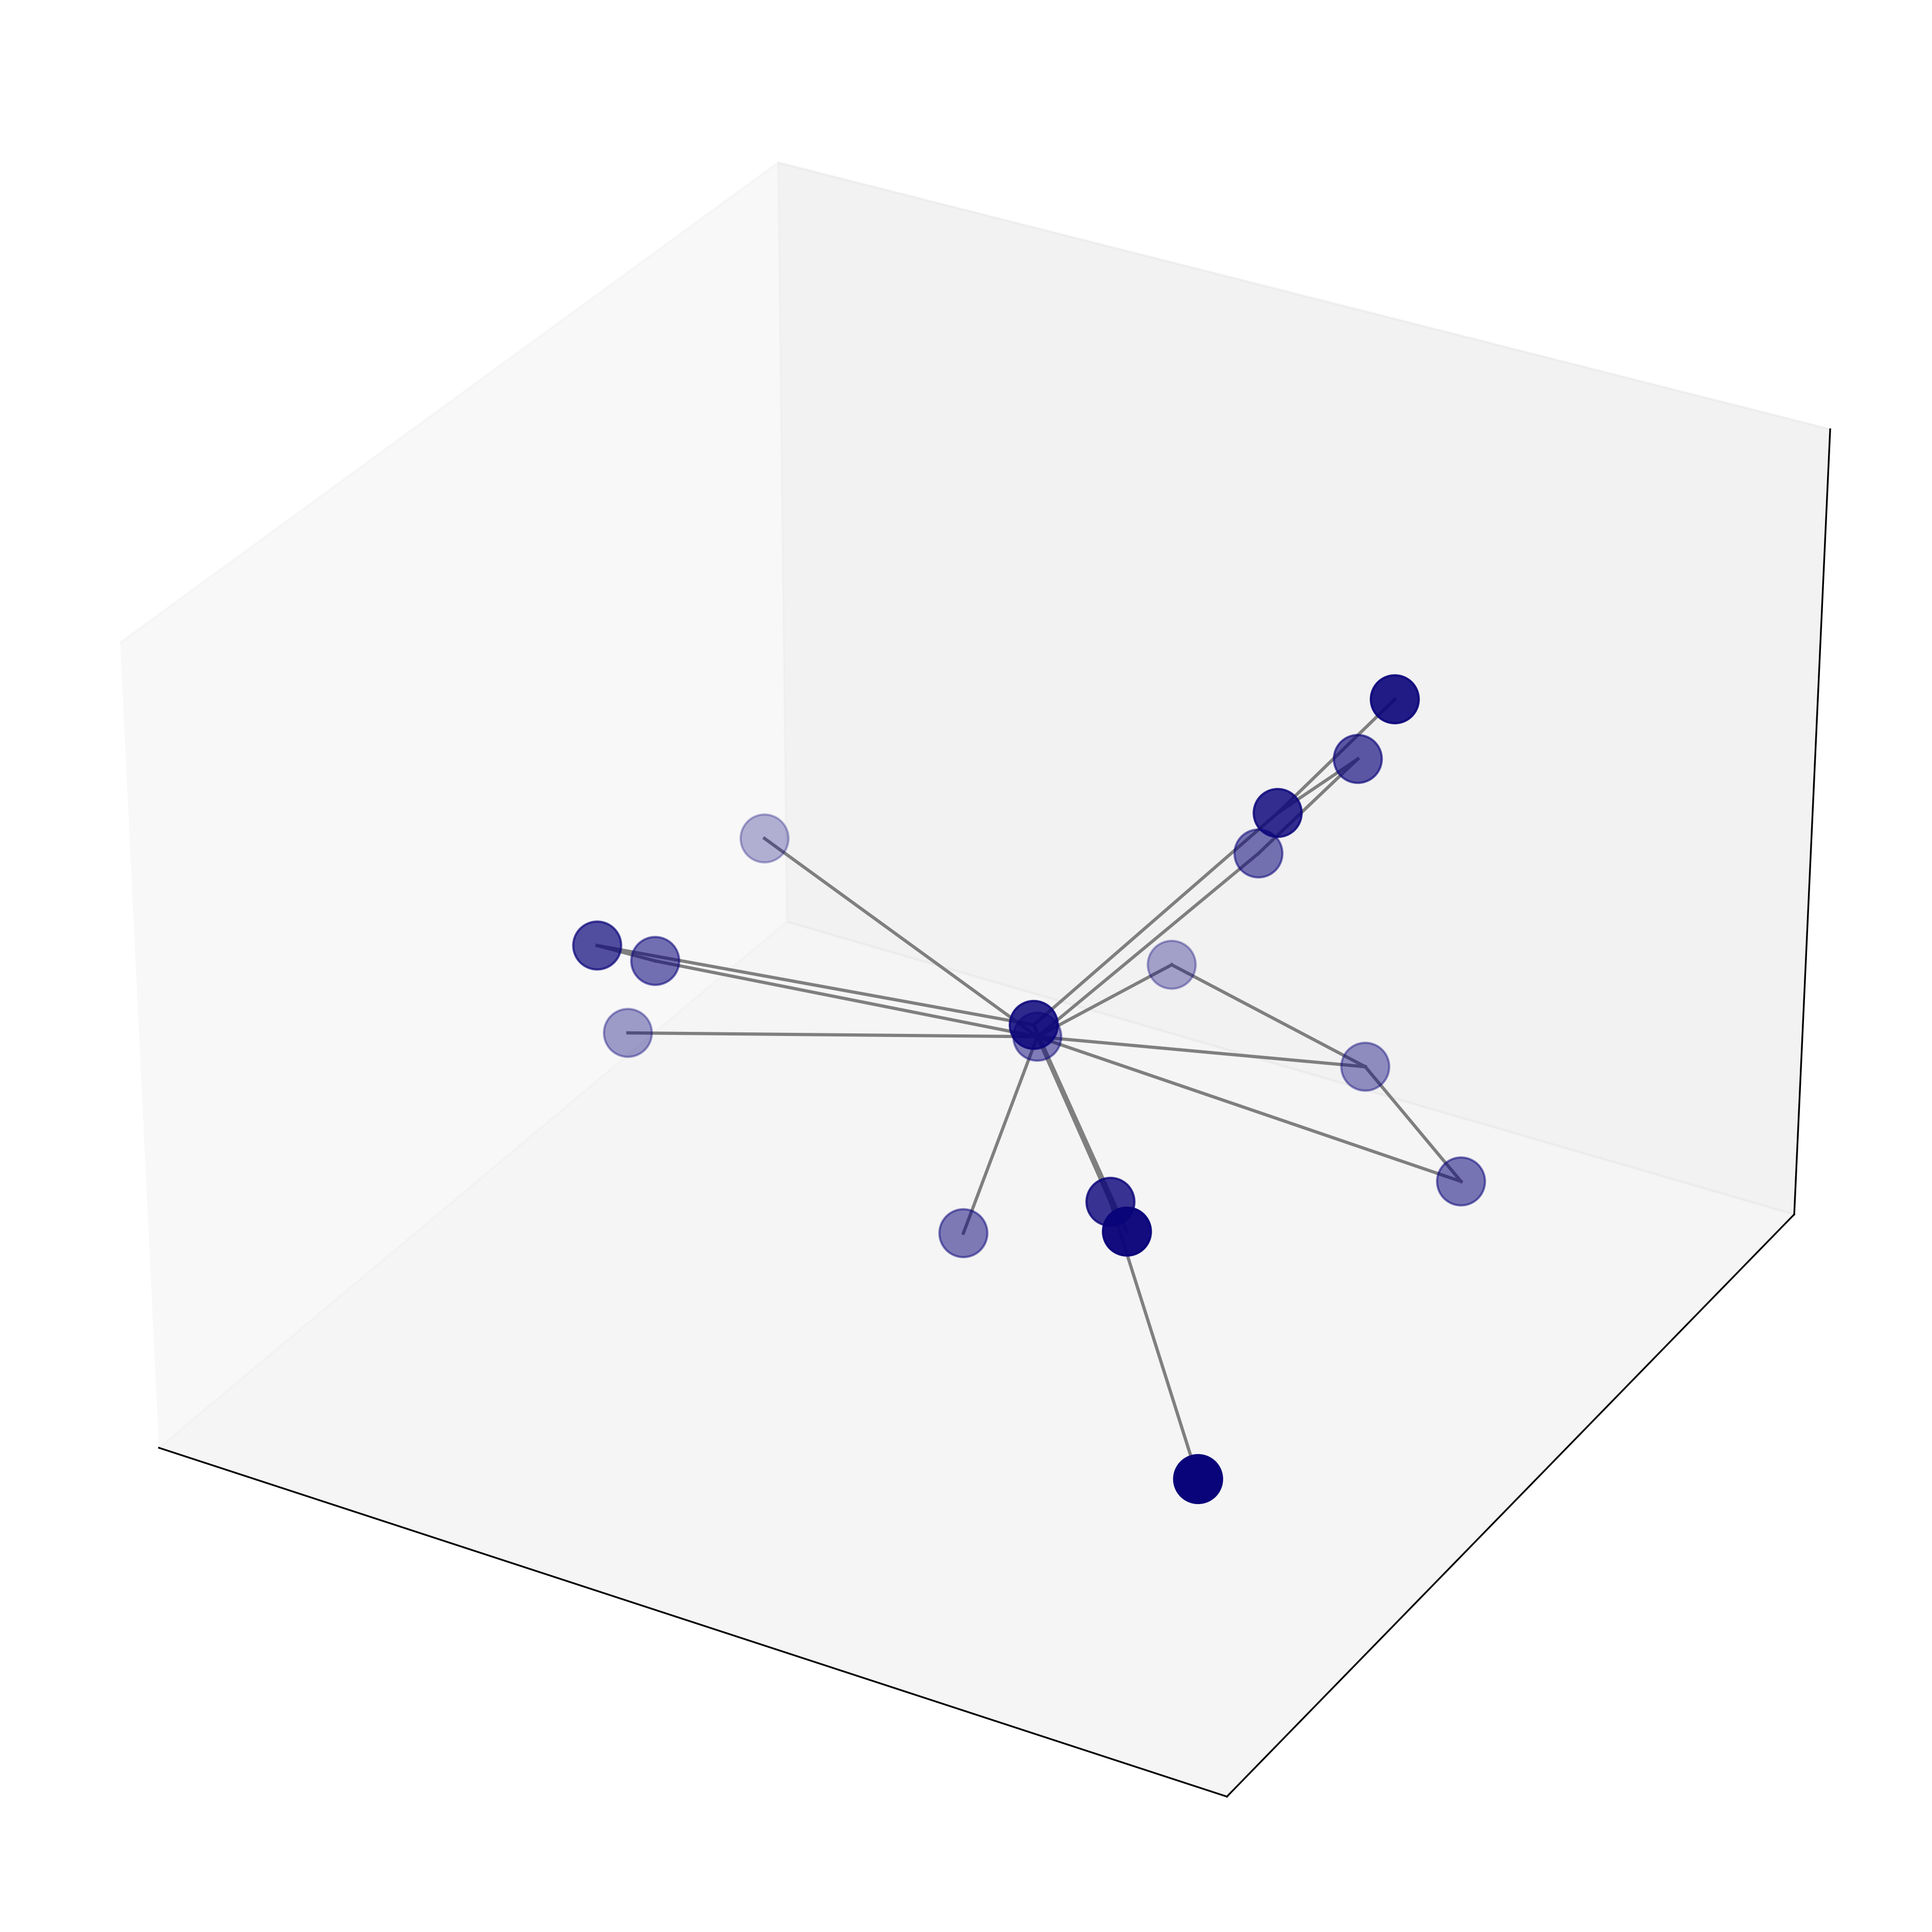

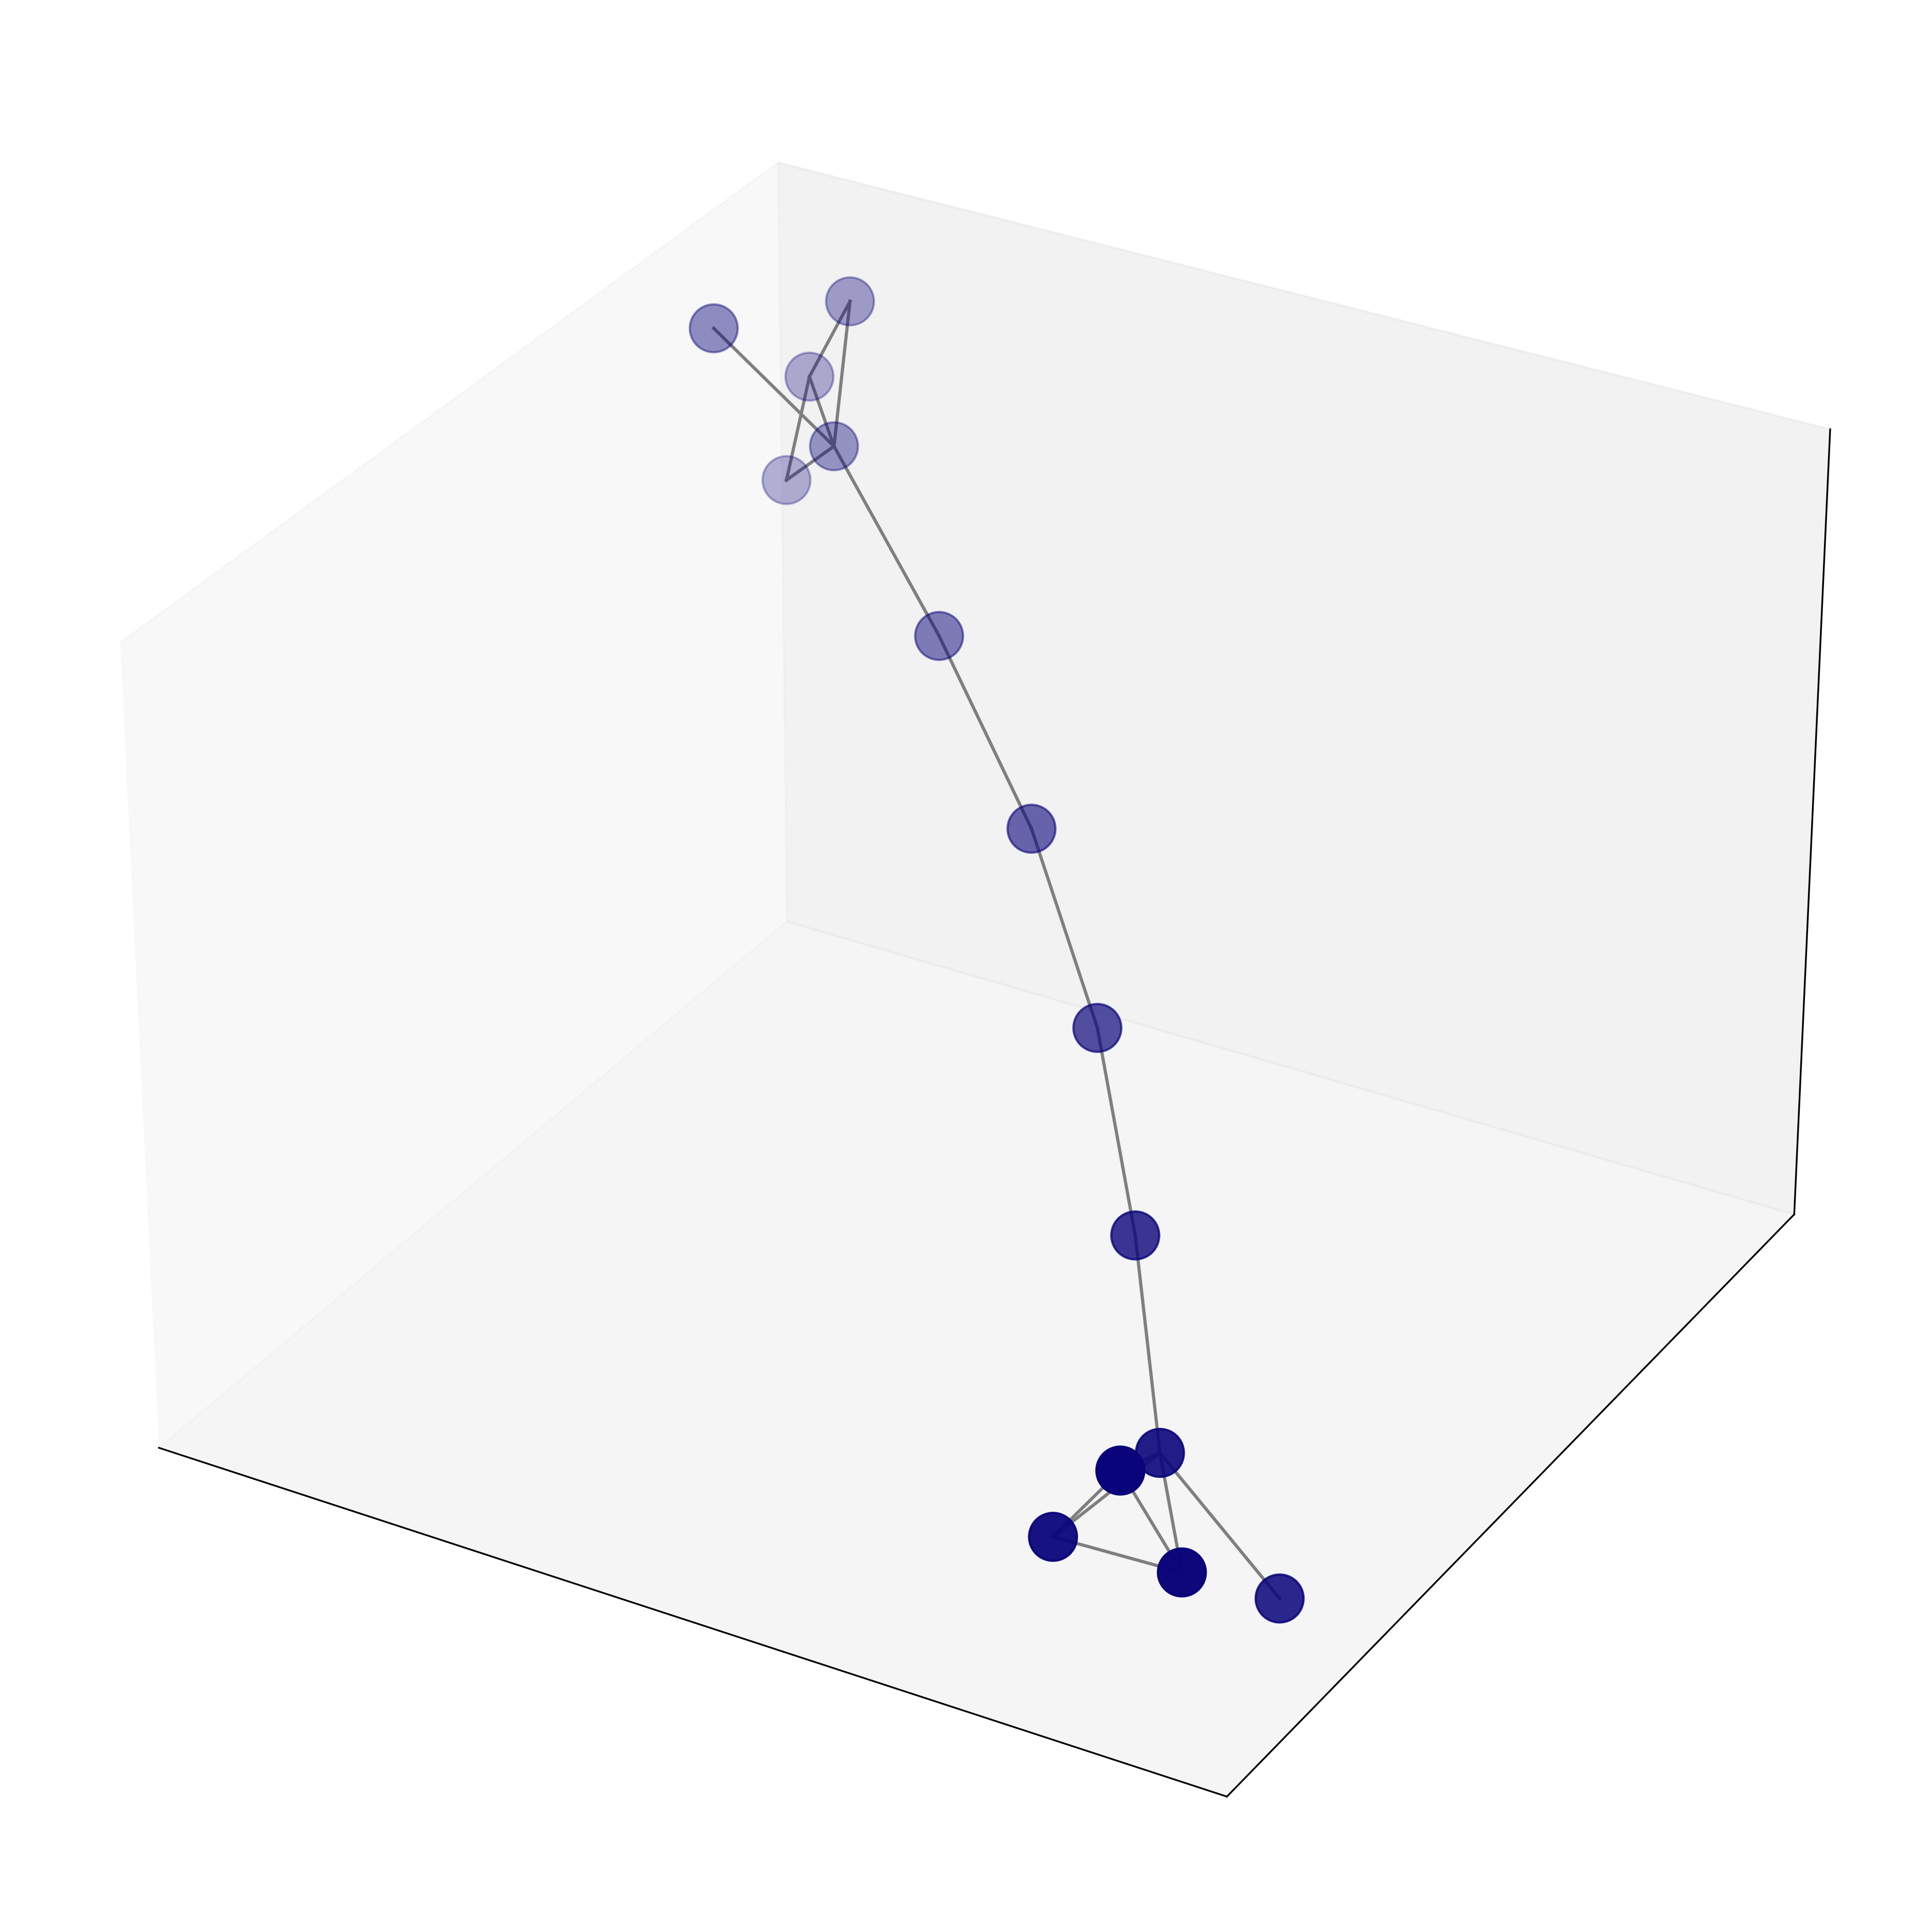

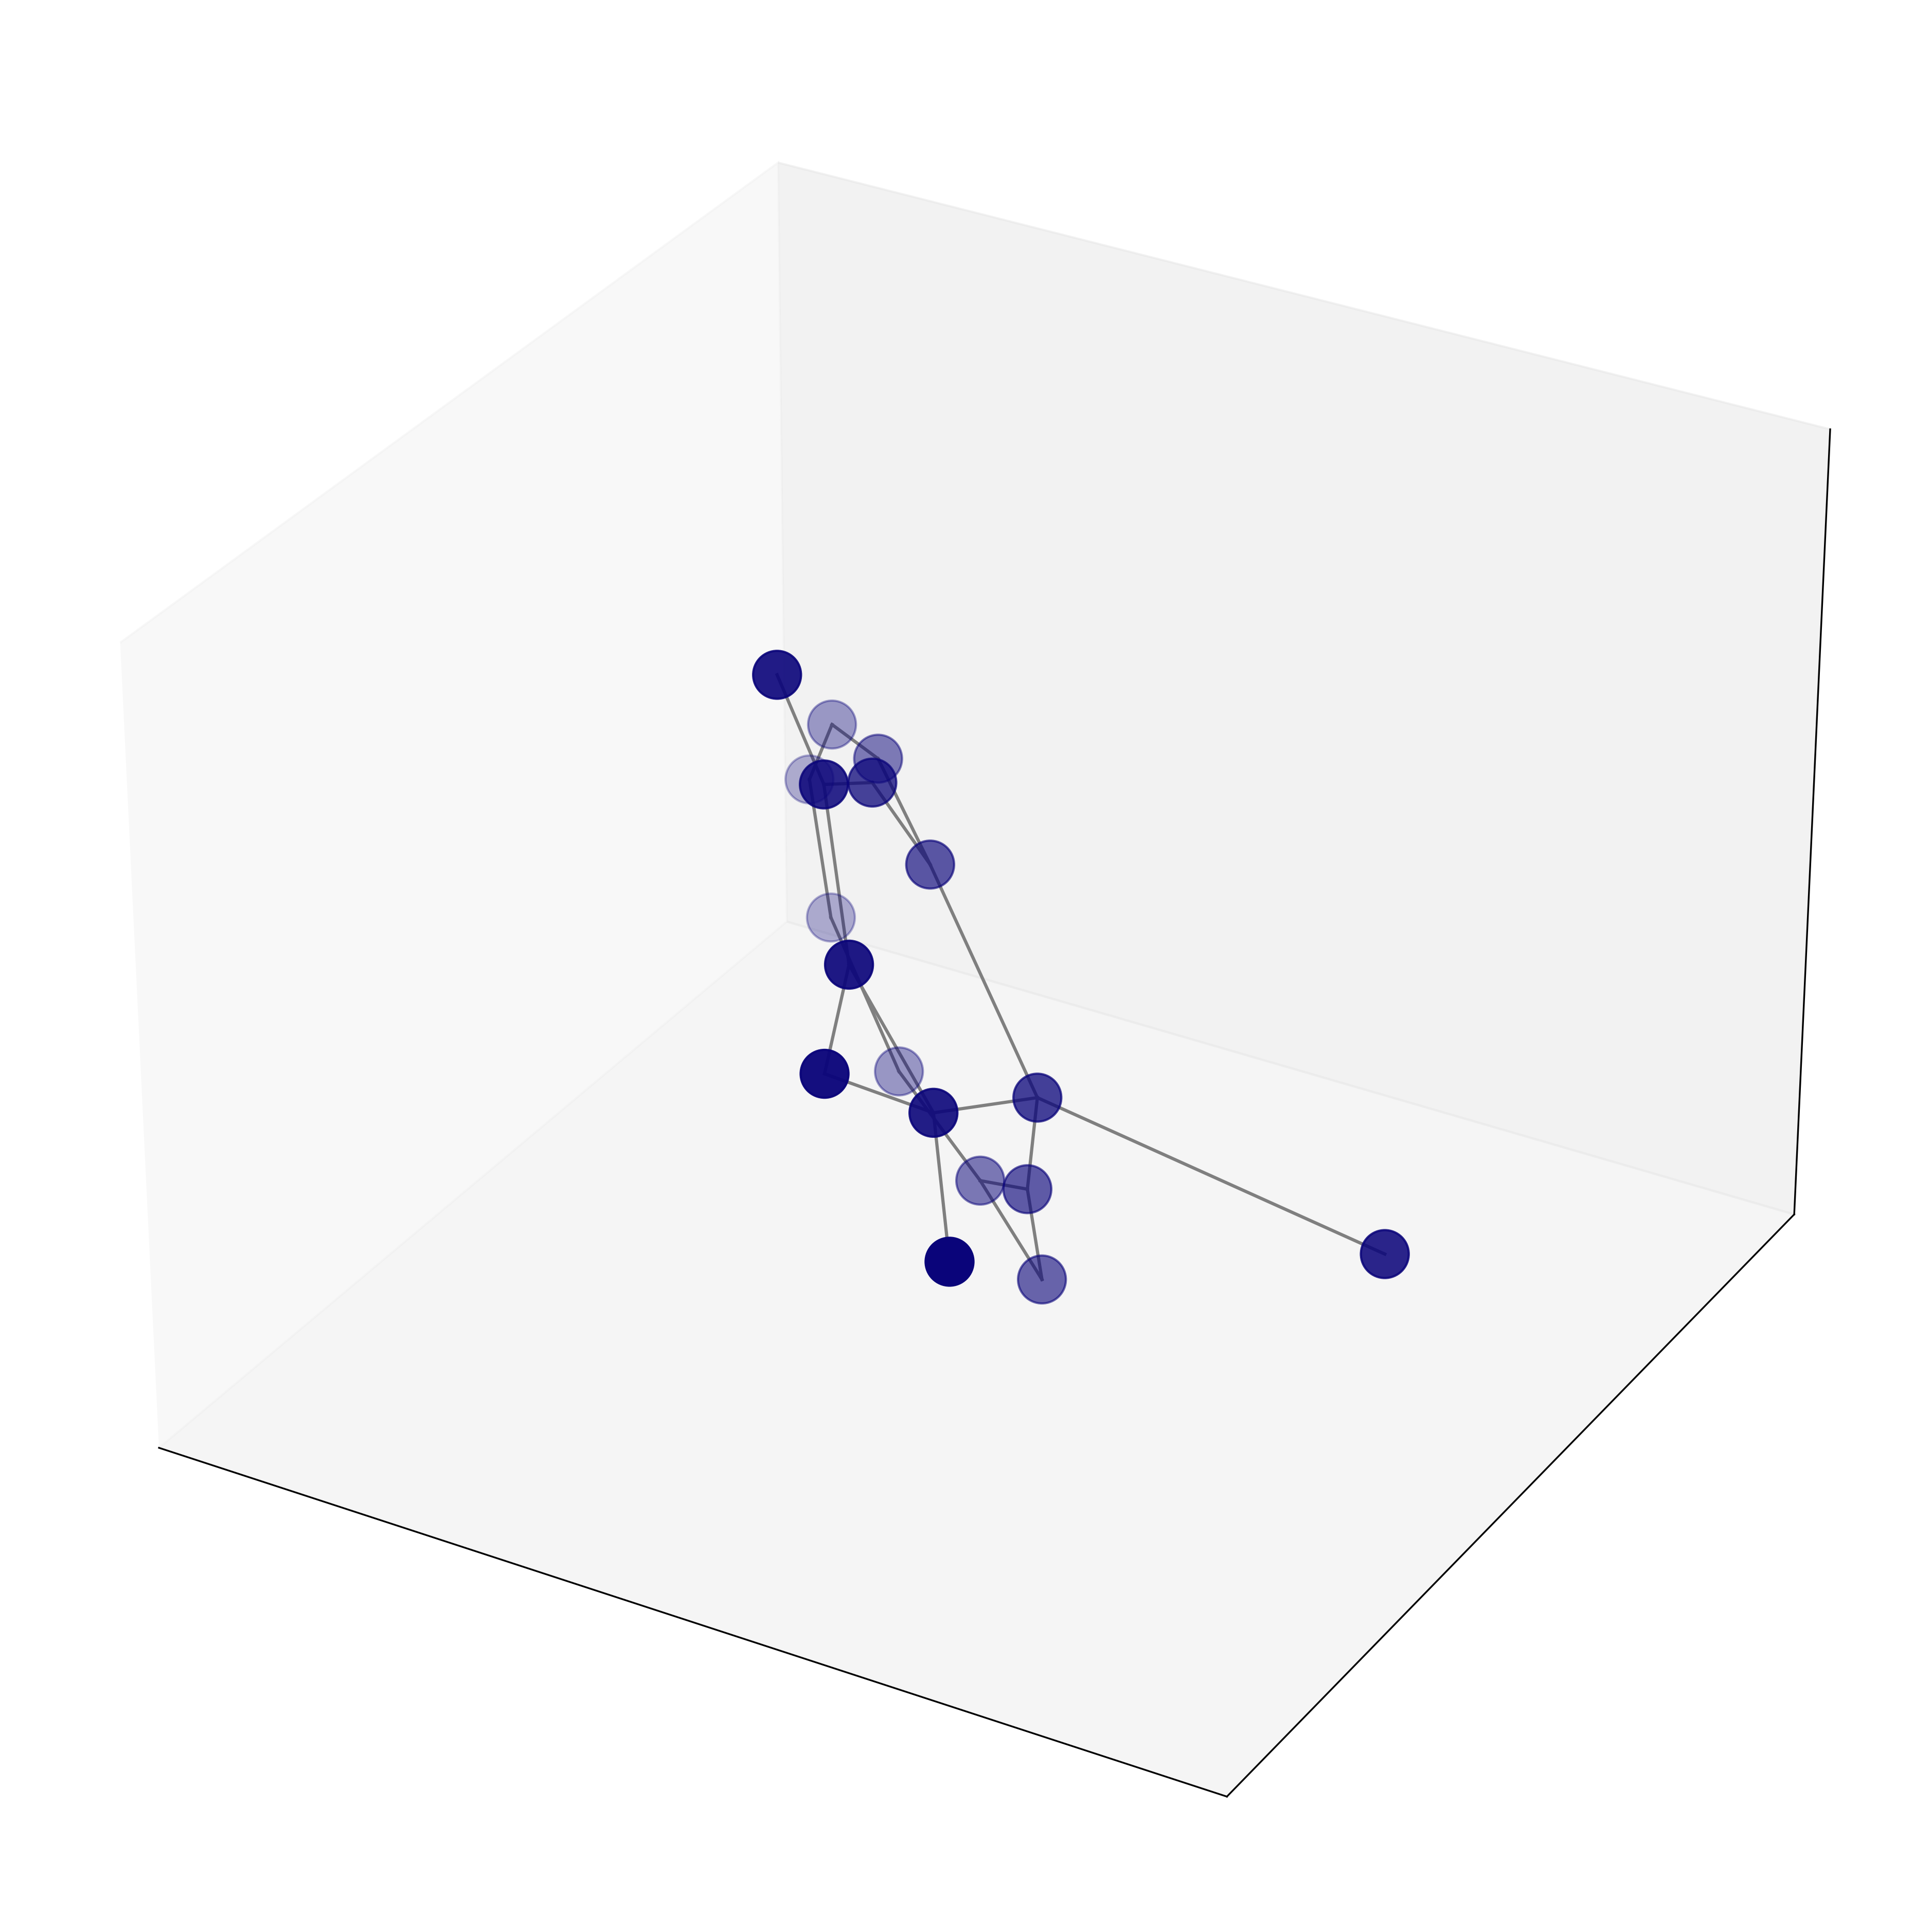

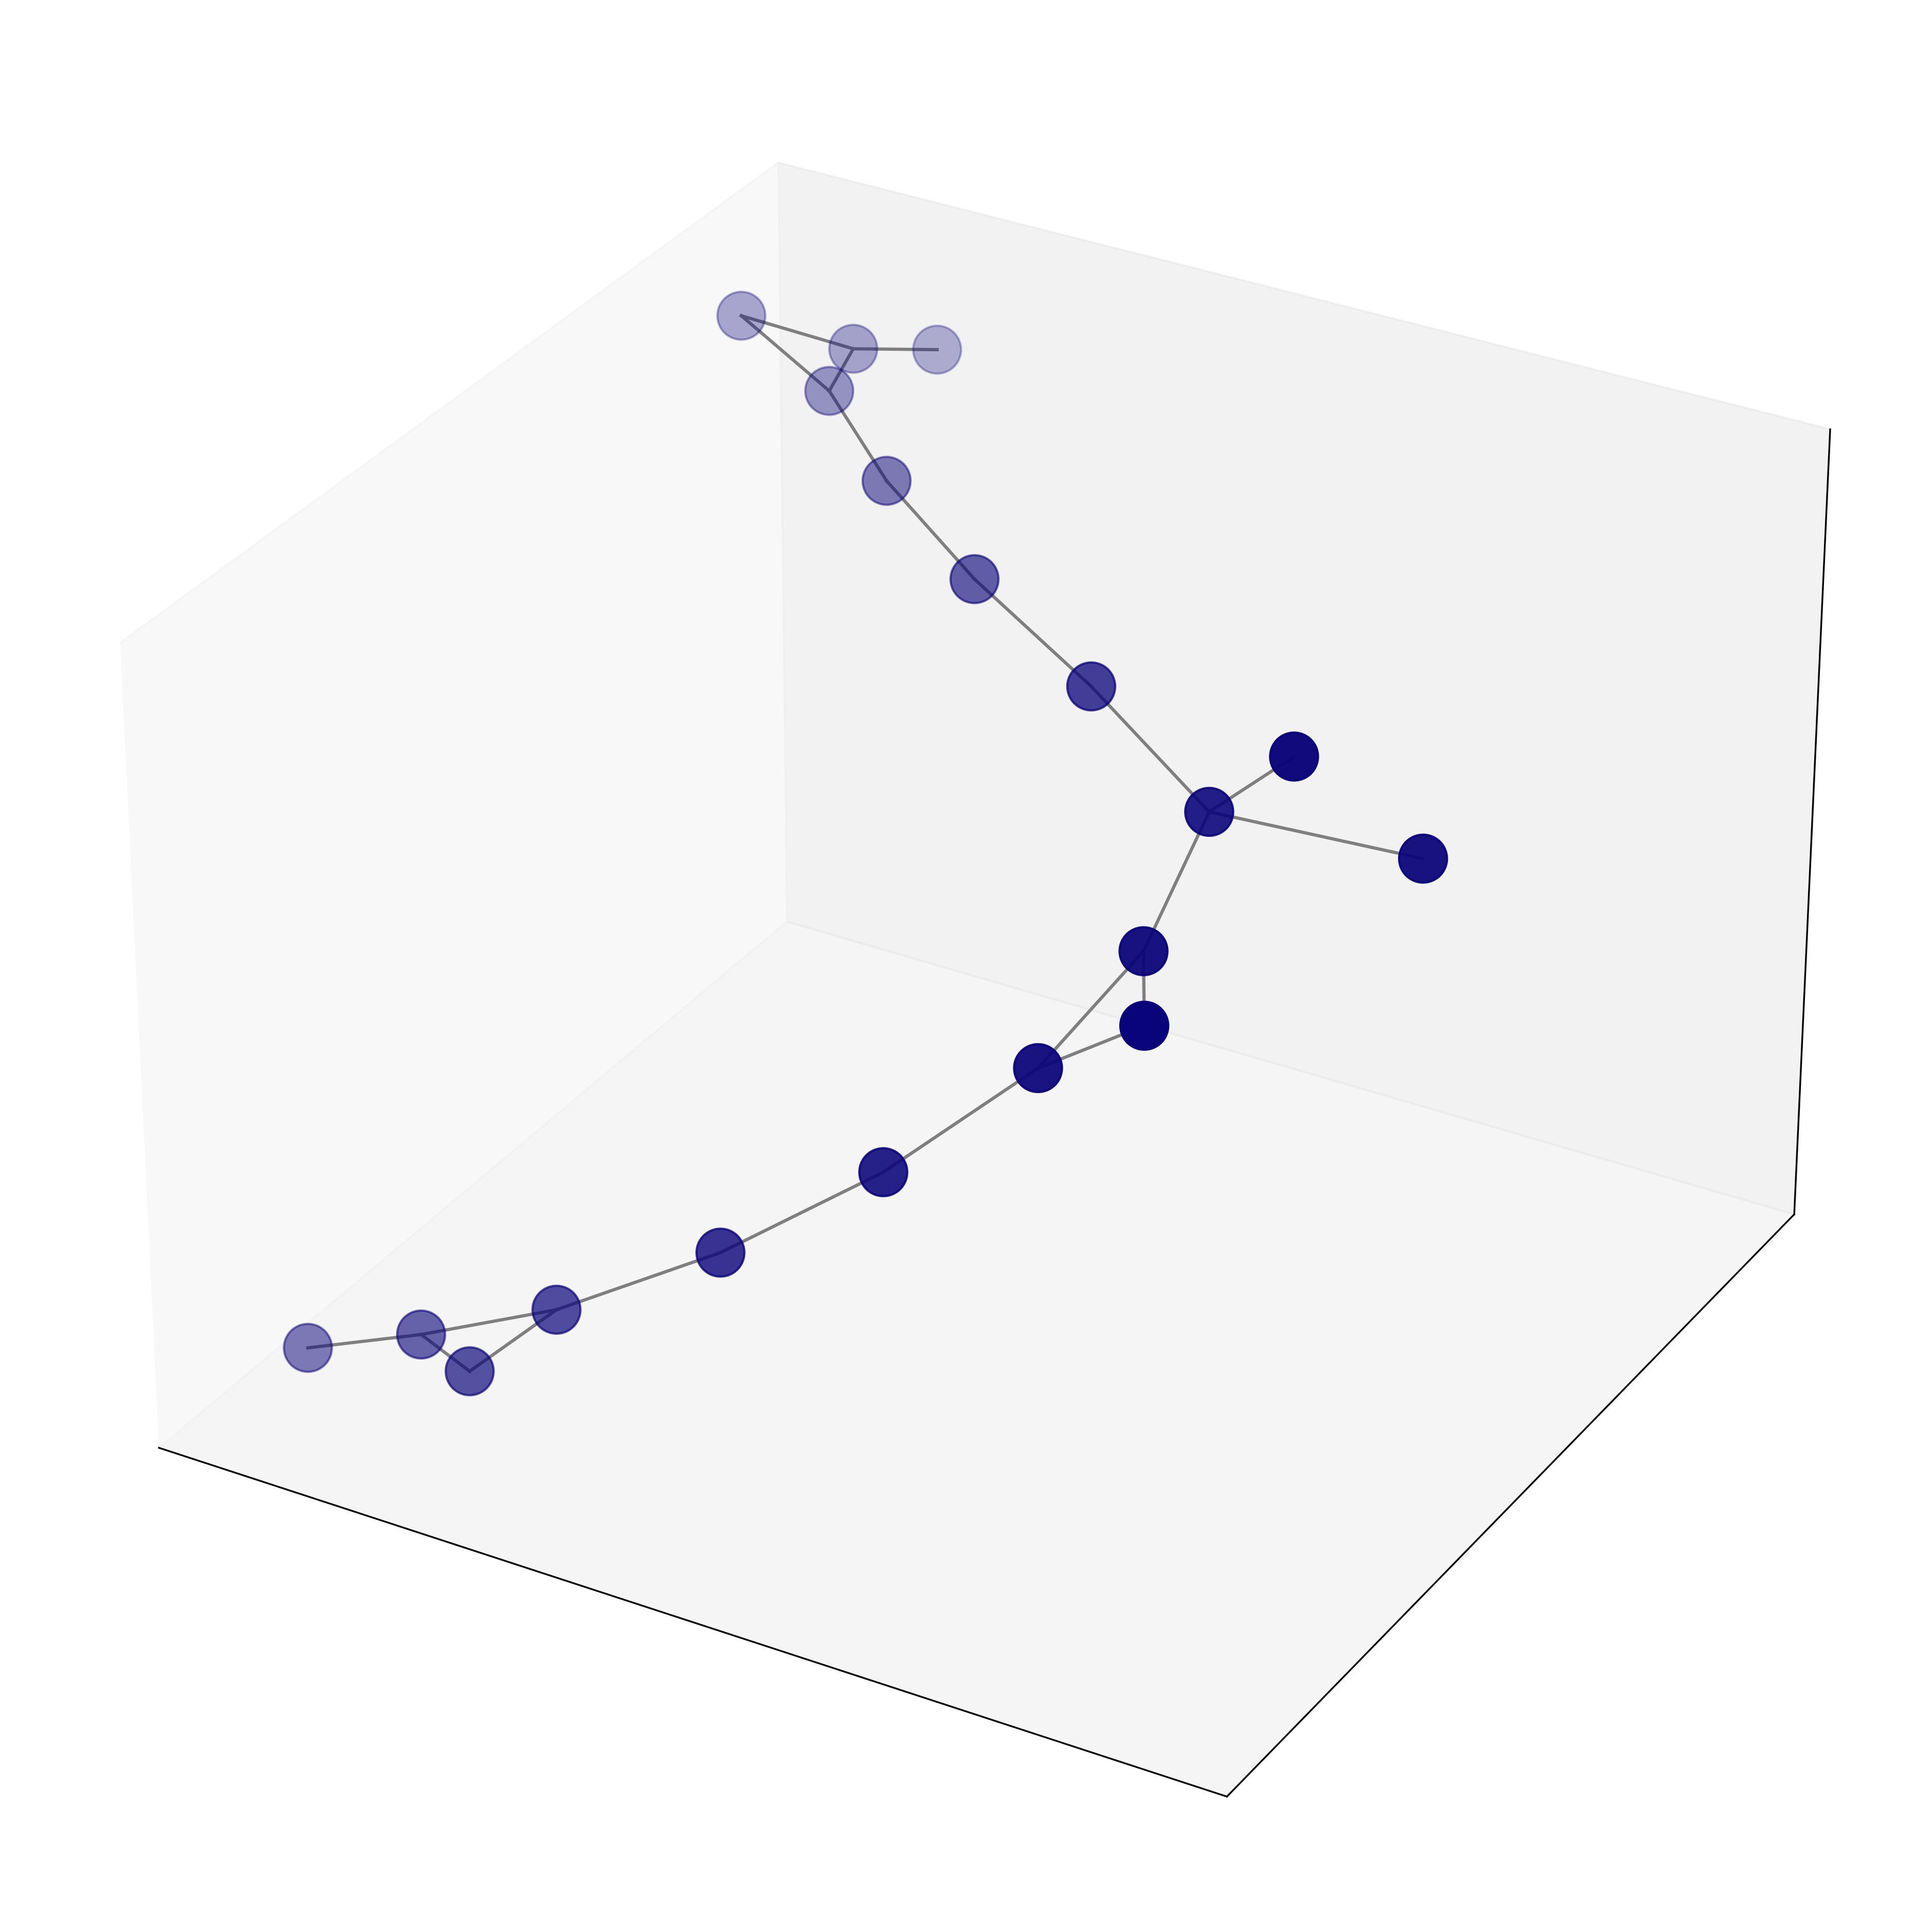

In [421]:
graph_visuals(dataset[0])
graph_visuals(dataset[10000])
graph_visuals(dataset[70023])
graph_visuals(dataset[len(dataset) - 1])

In [511]:
#embeddings testing

import torch
import torch.nn.functional as F
from torch.nn import Sequential, Linear, ReLU, BatchNorm1d
from torch_geometric.nn import GINConv, global_add_pool
import matplotlib.pyplot as plt

class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(dataset.num_node_features, dim_h),
                       BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.lin1 = Linear(dim_h*3, dim_h*3)
        self.lin2 = Linear(dim_h*3, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # Node embeddings
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Classifier
        h = self.lin1(h)
        h = h.relu()
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)

        return h, F.log_softmax(h, dim=1)

#gcn = GCN(dim_h=32)
gin = GIN(dim_h=32)

In [512]:
# training for embedding

In [513]:
from torch_geometric.loader import DataLoader
# Create training, validation, and test sets
print(dataset[10])
train_dataset = dataset[:int(len(dataset)*0.8)]
val_dataset   = dataset[int(len(dataset)*0.8):int(len(dataset)*0.9)]
test_dataset  = dataset[int(len(dataset)*0.9):]

print(f'Training set   = {len(train_dataset)} graphs')
print(f'Validation set = {len(val_dataset)} graphs')
print(f'Test set       = {len(test_dataset)} graphs')

# Create mini-batches
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print('\nTrain loader:')
for i, subgraph in enumerate(train_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nValidation loader:')
for i, subgraph in enumerate(val_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nTest loader:')
for i, subgraph in enumerate(test_loader):
    print(f' - Subgraph {i}: {subgraph}')

Data(x=[18, 1], edge_index=[2, 42], y=[1])
Training set   = 64000 graphs
Validation set = 8000 graphs
Test set       = 8000 graphs

Train loader:
 - Subgraph 0: DataBatch(x=[1105, 1], edge_index=[2, 2434], y=[64], batch=[1105], ptr=[65])
 - Subgraph 1: DataBatch(x=[1086, 1], edge_index=[2, 2388], y=[64], batch=[1086], ptr=[65])
 - Subgraph 2: DataBatch(x=[1086, 1], edge_index=[2, 2334], y=[64], batch=[1086], ptr=[65])
 - Subgraph 3: DataBatch(x=[1099, 1], edge_index=[2, 2406], y=[64], batch=[1099], ptr=[65])
 - Subgraph 4: DataBatch(x=[1068, 1], edge_index=[2, 2352], y=[64], batch=[1068], ptr=[65])
 - Subgraph 5: DataBatch(x=[1093, 1], edge_index=[2, 2410], y=[64], batch=[1093], ptr=[65])
 - Subgraph 6: DataBatch(x=[1062, 1], edge_index=[2, 2374], y=[64], batch=[1062], ptr=[65])
 - Subgraph 7: DataBatch(x=[1091, 1], edge_index=[2, 2424], y=[64], batch=[1091], ptr=[65])
 - Subgraph 8: DataBatch(x=[1110, 1], edge_index=[2, 2498], y=[64], batch=[1110], ptr=[65])
 - Subgraph 9: DataBatch(x

In [159]:
def train(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),
                                      lr=0.01,
                                      weight_decay=0.01)
    epochs = 1

    model.train()
    for epoch in range(epochs+1):
        #print(epoch)
        total_loss = 0
        acc = 0
        val_loss = 0
        val_acc = 0

        # Train on batches
        for data in loader:
          optimizer.zero_grad()
          _, out = model(data.x, data.edge_index, data.batch)
          loss = criterion(out, data.y)
          total_loss += loss / len(loader)
          acc += accuracy(out.argmax(dim=1), data.y) / len(loader)
          loss.backward()
          optimizer.step()

          # Validation
          val_loss, val_acc = test(model, val_loader)

          # print per epoch to see if the accuracy goes up!
        print(f'Epoch {epoch:>0} | Train Loss: {total_loss:.2f} '
            f'| Train Acc: {acc*100:>5.2f}% '
            f'| Val Loss: {val_loss:.2f} '
            f'| Val Acc: {val_acc*100:.2f}%')


    test_loss, test_acc = test(model, test_loader)
    print(f'Test Loss: {test_loss:.2f} | Test Acc: {test_acc*100:.2f}%')

    return model

@torch.no_grad()
def test(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    model.eval()
    loss = 0
    acc = 0

    for data in loader:
        _, out = model(data.x, data.edge_index, data.batch)
        loss += criterion(out, data.y) / len(loader)
        acc += accuracy(out.argmax(dim=1), data.y) / len(loader)

    return loss, acc

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

#gcn = train(gcn, train_loader)
gin = train(gin, train_loader)

Epoch 0 | Train Loss: 1.14 | Train Acc: 47.86% | Val Loss: 1.12 | Val Acc: 49.51%
Epoch 1 | Train Loss: 1.09 | Train Acc: 49.72% | Val Loss: 1.10 | Val Acc: 49.34%
Test Loss: 1.12 | Test Acc: 48.39%


In [514]:
torch.manual_seed(42)
np.random.seed(42)

model = GIN(dim_h=32)
model.eval()

threshold_val = 90000

# Initialize lists to store embeddings and labels
embeddings_list = []
labels_list = []

selected = []

for data in dataset:
    new_x = data.x
    new_y = data.y

    # Create a reference graph with edges between consecutive nodes
    reference_graph = np.zeros((len(data.x), len(data.x)))
    for i in range(reference_graph.shape[0] - 1):
        reference_graph[i][i + 1] = 1
        reference_graph[i + 1][i] = 1

    reference_adj = sp.coo_matrix(reference_graph)
    edge_index, edge_attr = from_scipy_sparse_matrix(reference_adj)
    data_reference = Data(x=new_x, edge_index=edge_index, y=new_y)

    with torch.no_grad():
        # Get embeddings from the model
        embedding_out, _ = model(data.x, data.edge_index, data.batch)
        embedding_out_reference, _ = model(data_reference.x, data_reference.edge_index, data.batch)
    # Convert embeddings to numpy arrays and detach from gradient computation
    out_tensor = embedding_out.detach().numpy()
    reference_out_tensor = embedding_out_reference.detach().numpy()
    #print(embedding_out.argmax(dim = 1))
    # Append embeddings and labels to lists
    embeddings_list.append(out_tensor)
    embeddings_list.append(reference_out_tensor)
    labels_list.append(data.y.numpy())
    labels_list.append(data_reference.y.numpy())
    # Calculate Euclidean distance and select based on threshold
    e_dis = np.linalg.norm(out_tensor - reference_out_tensor)
    if e_dis >= threshold_val:
        selected.append(data)

# Convert lists to numpy arrays for plotting
embeddings = np.array(embeddings_list)
labels = np.hstack(labels_list)

# Plotting the embeddings
plt.figure(figsize=(8, 6))

# Extracting dimensions for plotting
embeddings_out_reference = embeddings[1::2, :, :]
embeddings_out = embeddings[::2, :, :]

color_dict = {0: "green", 1: "purple", 2: "yellow", 3: "orange"}

# Scatter plot for embedding_out_reference (colored by labels)




<Figure size 2400x1800 with 0 Axes>

In [515]:
print(len(selected))

161


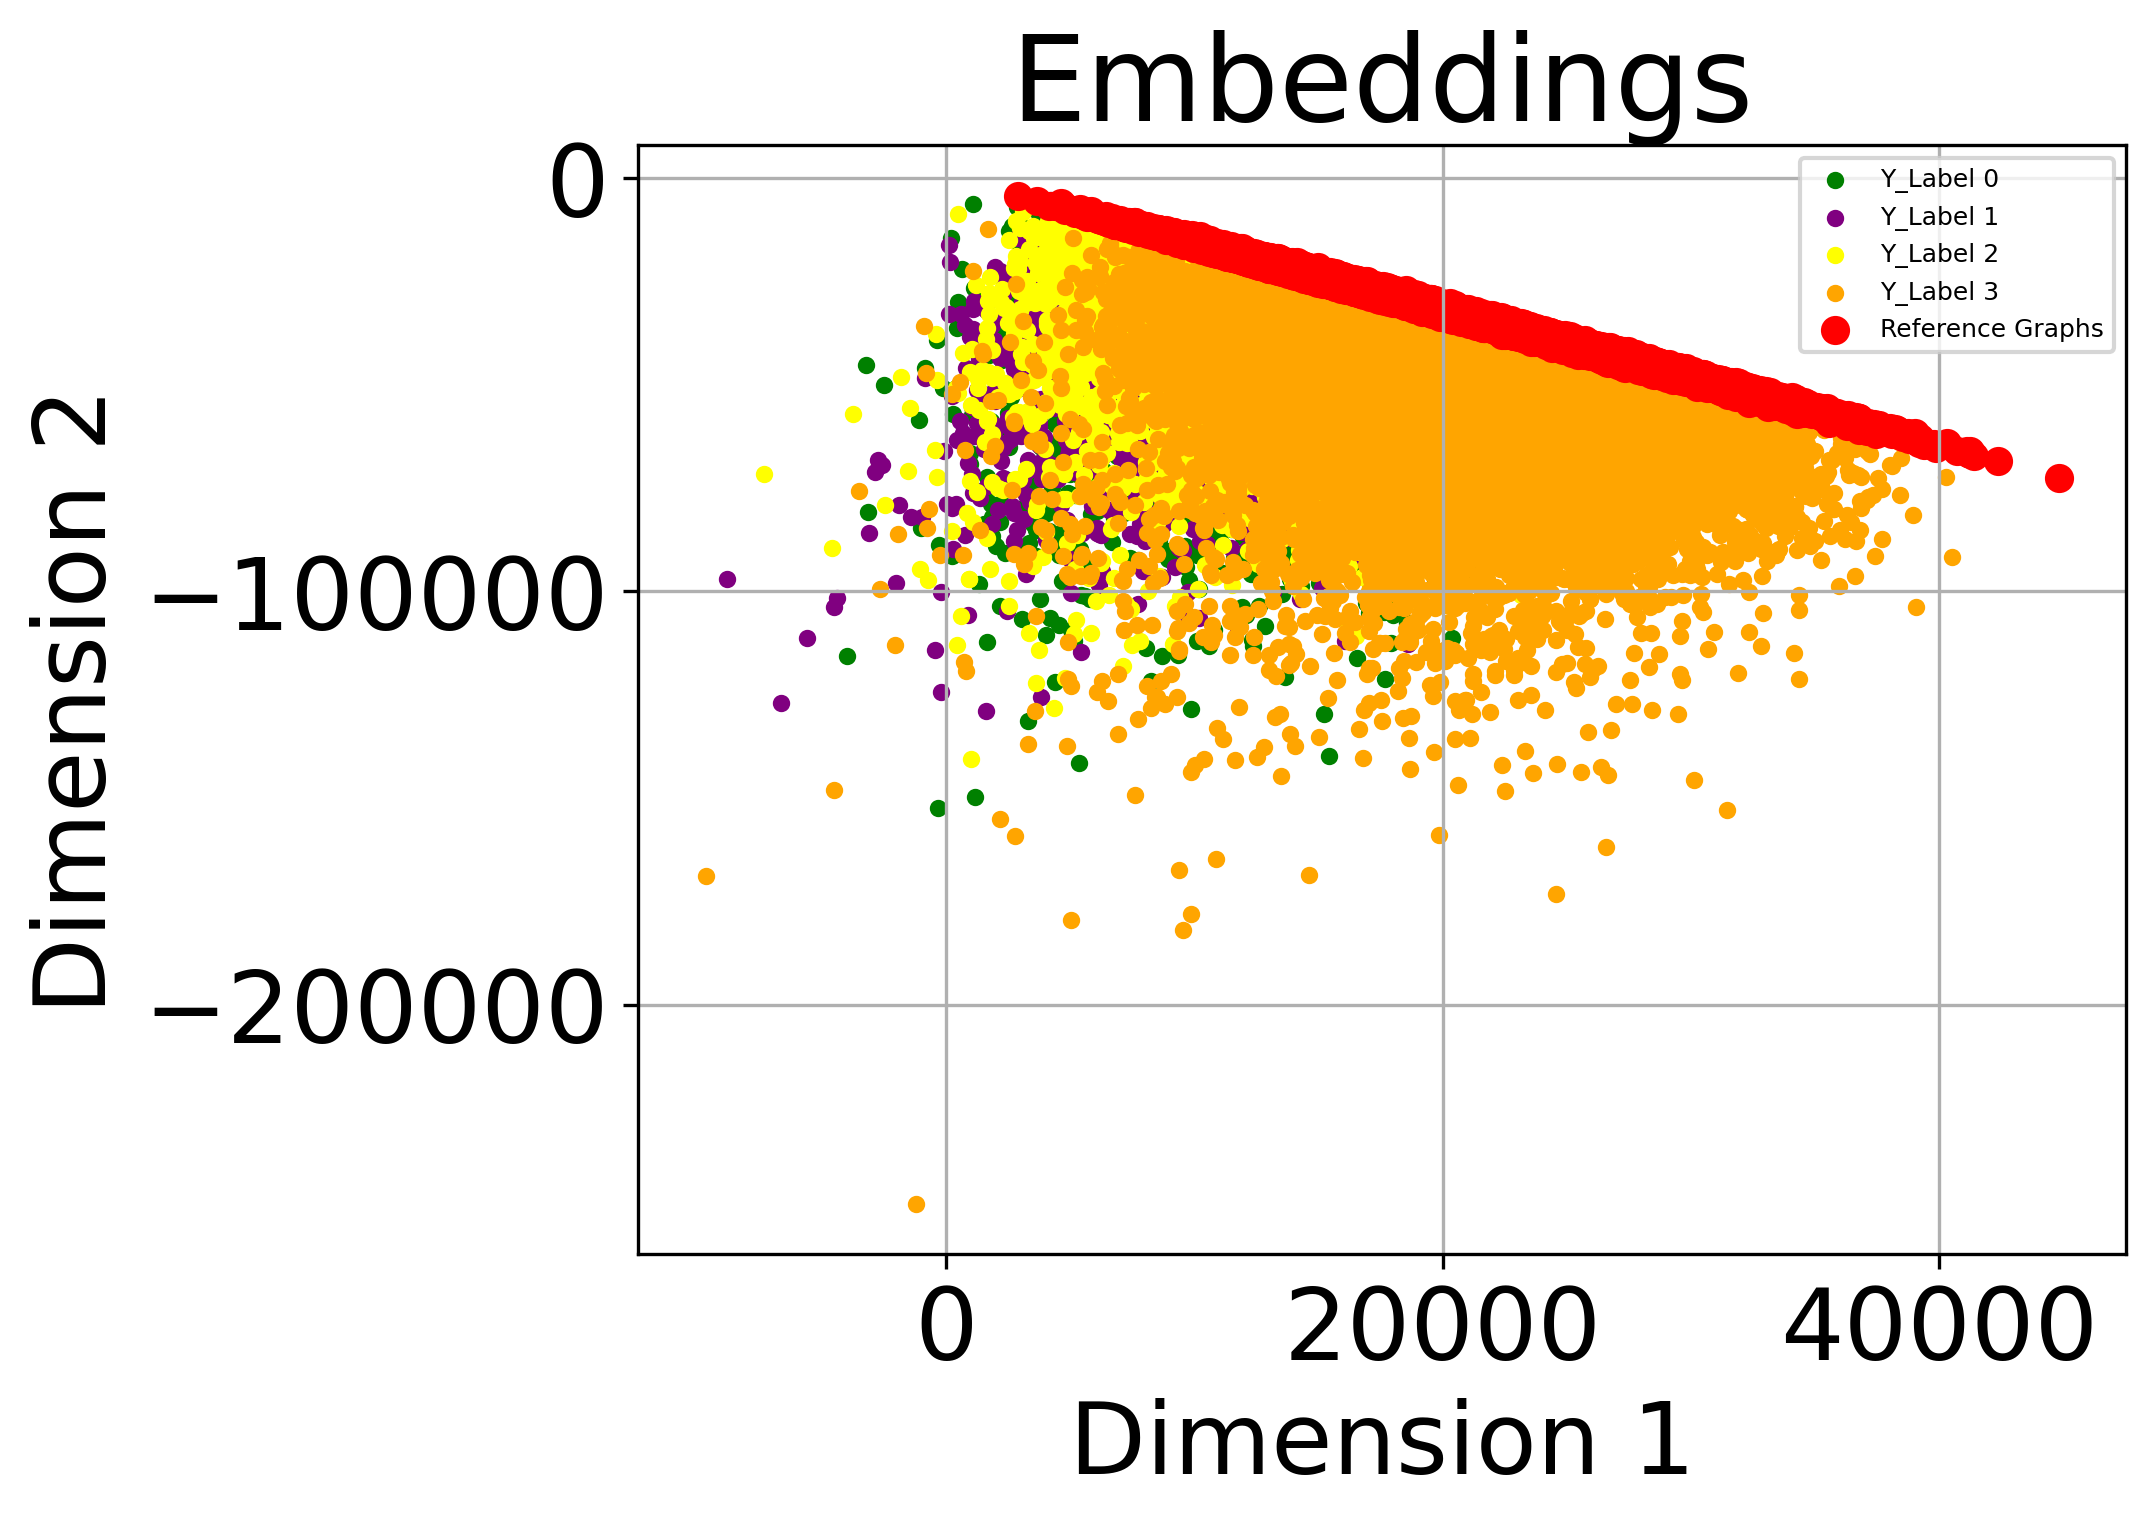

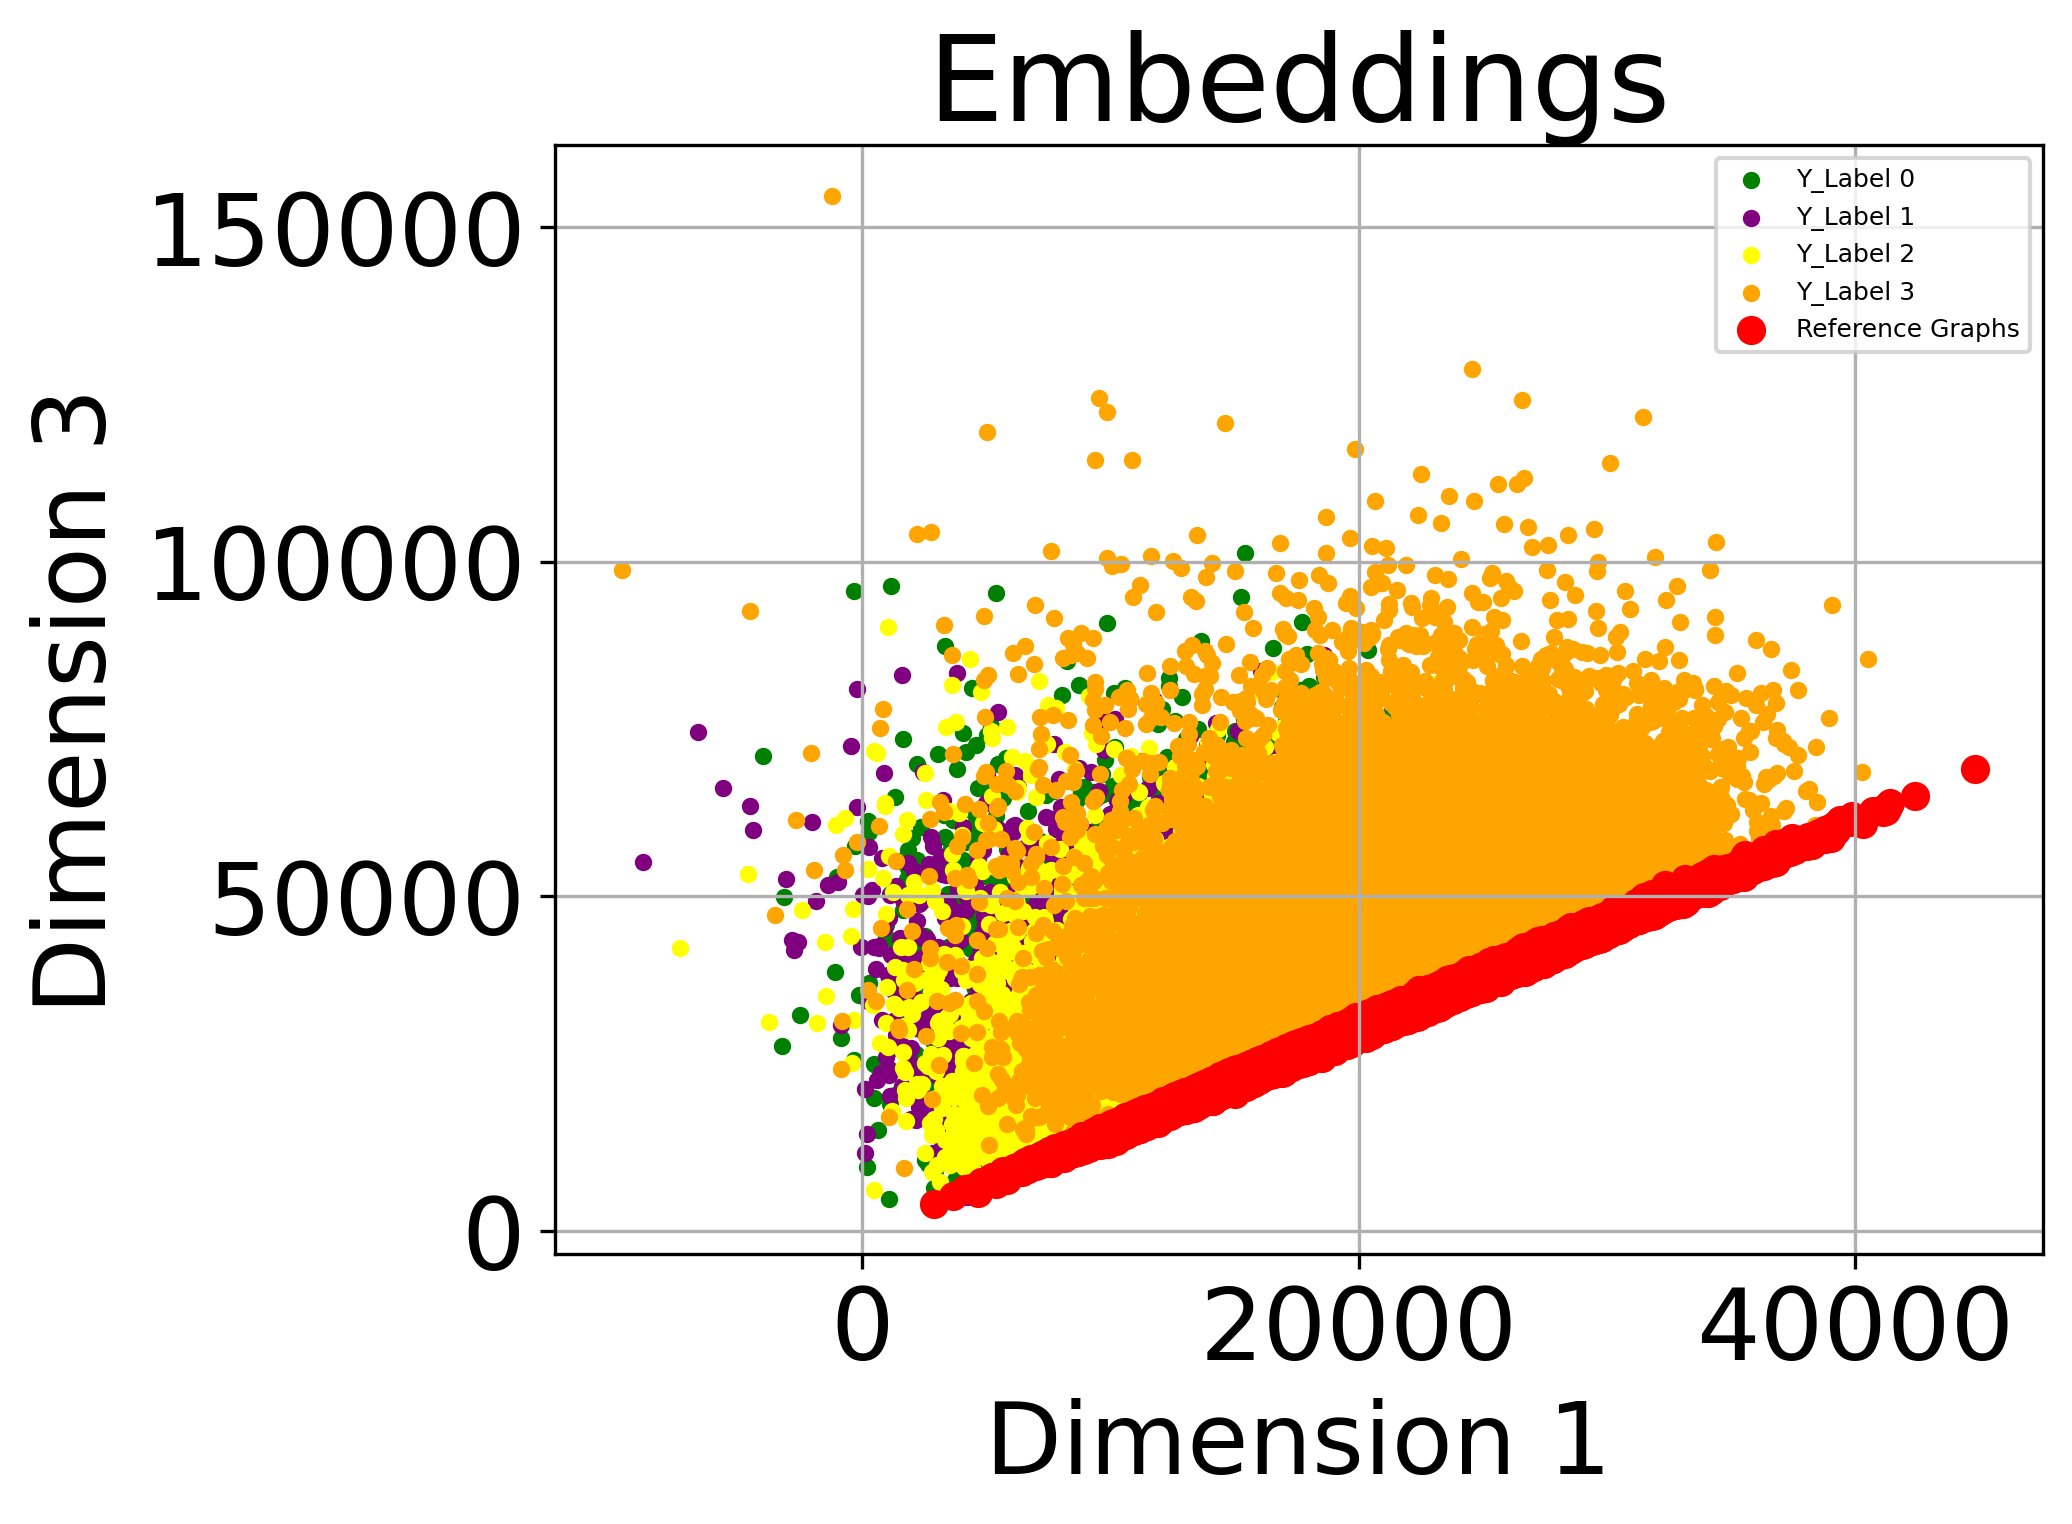

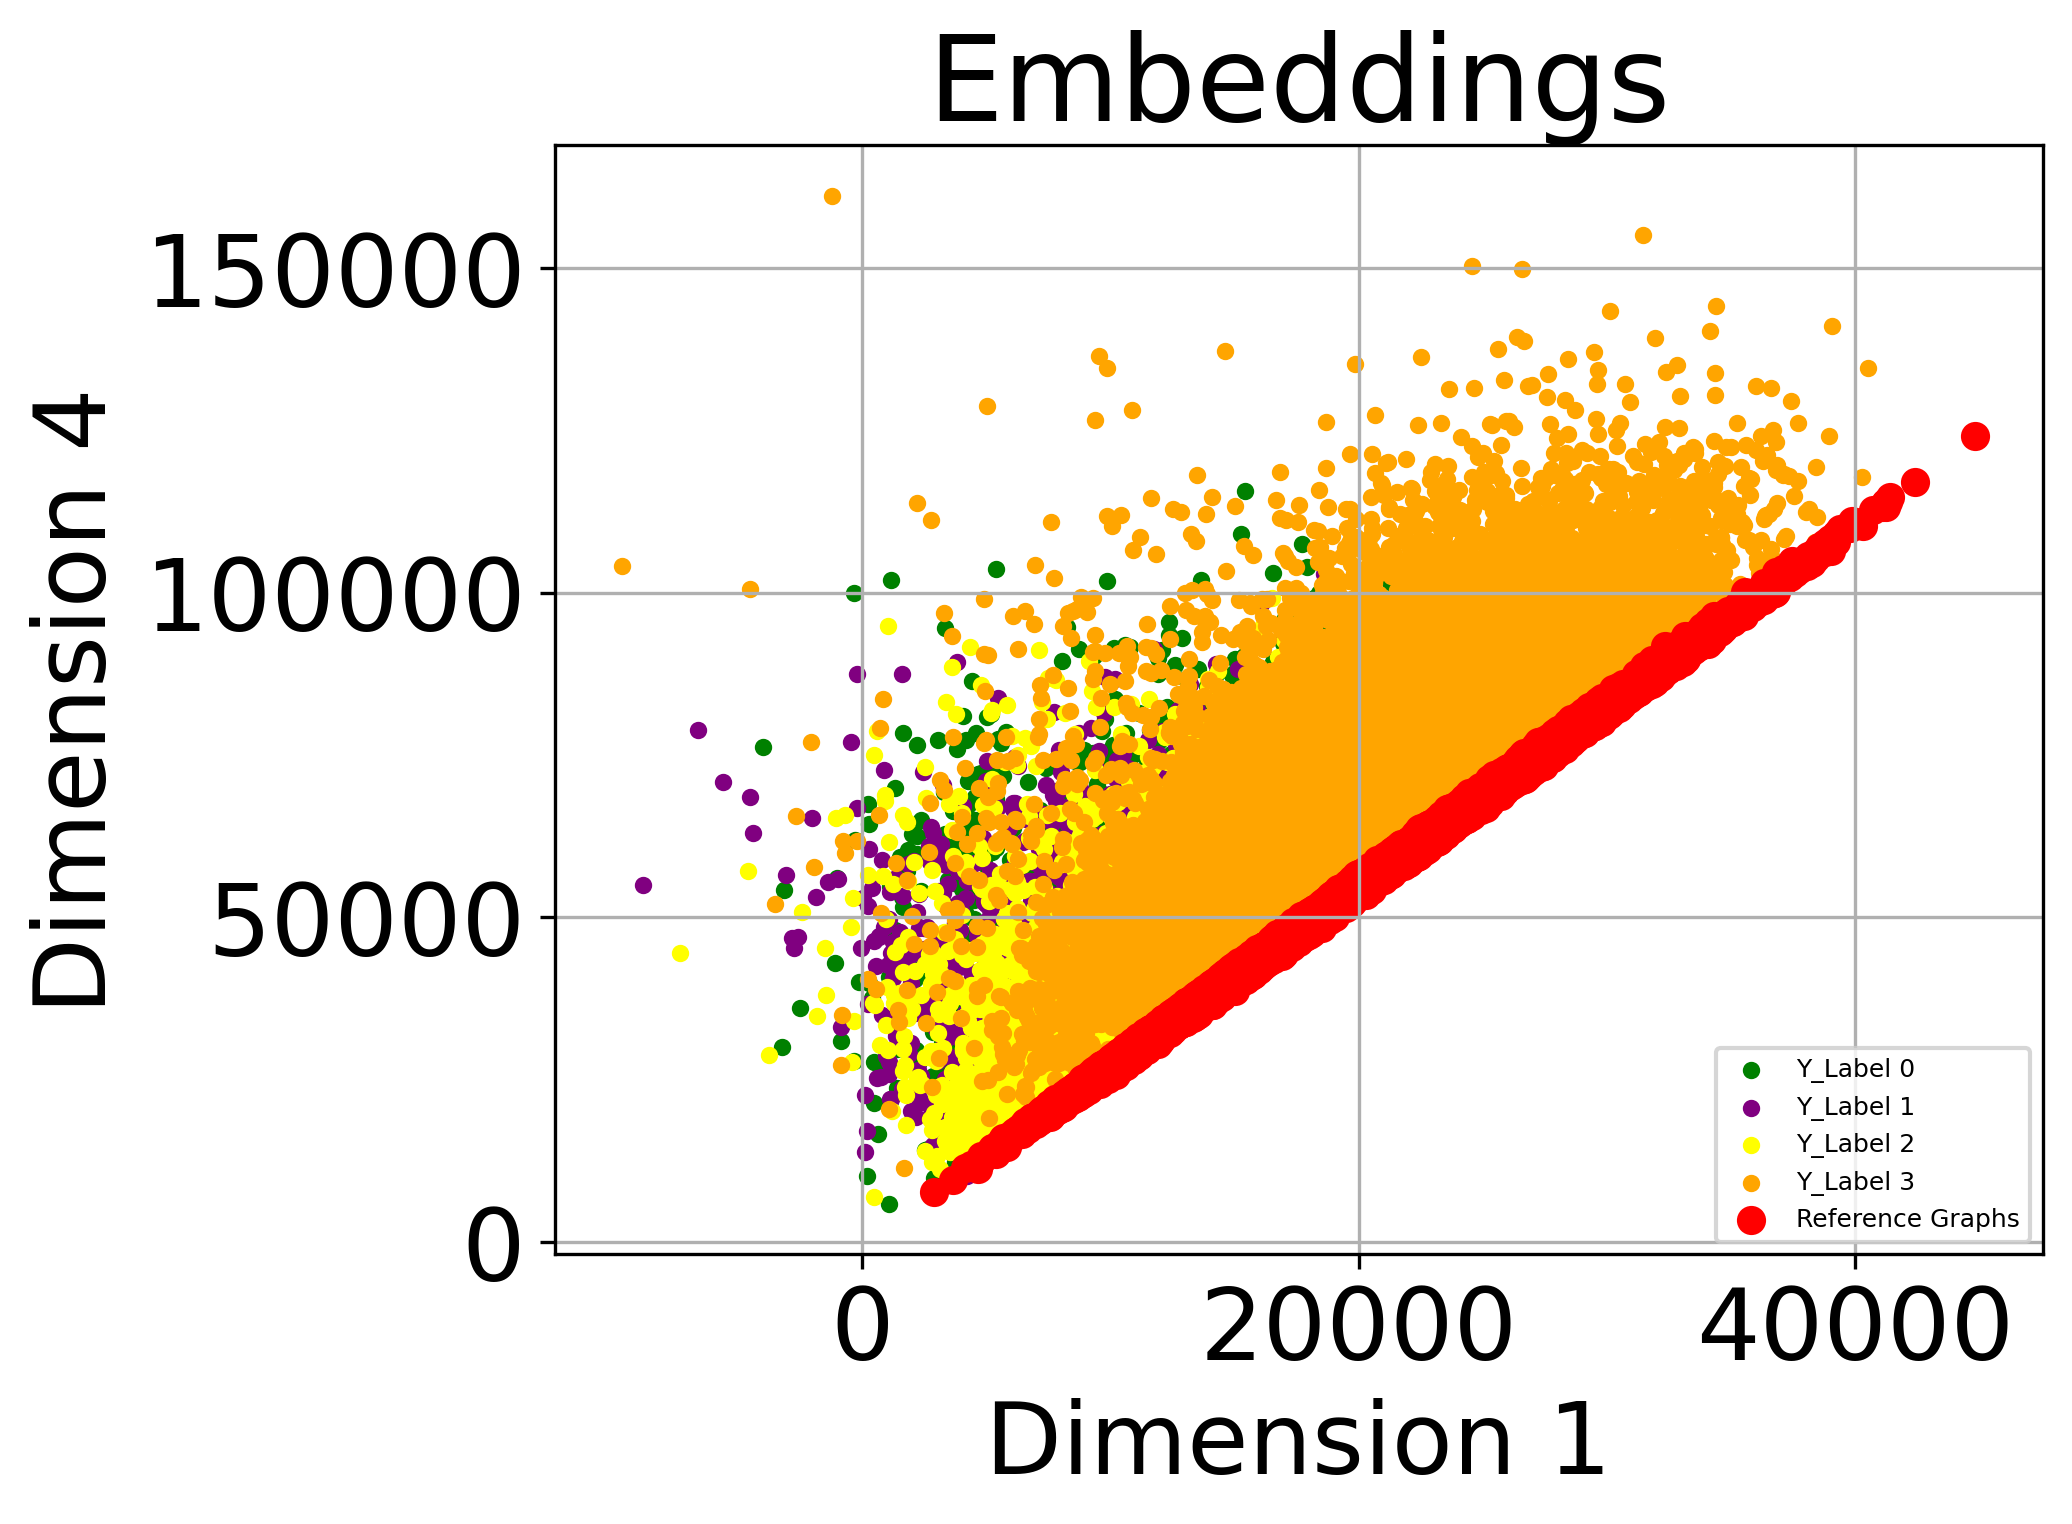

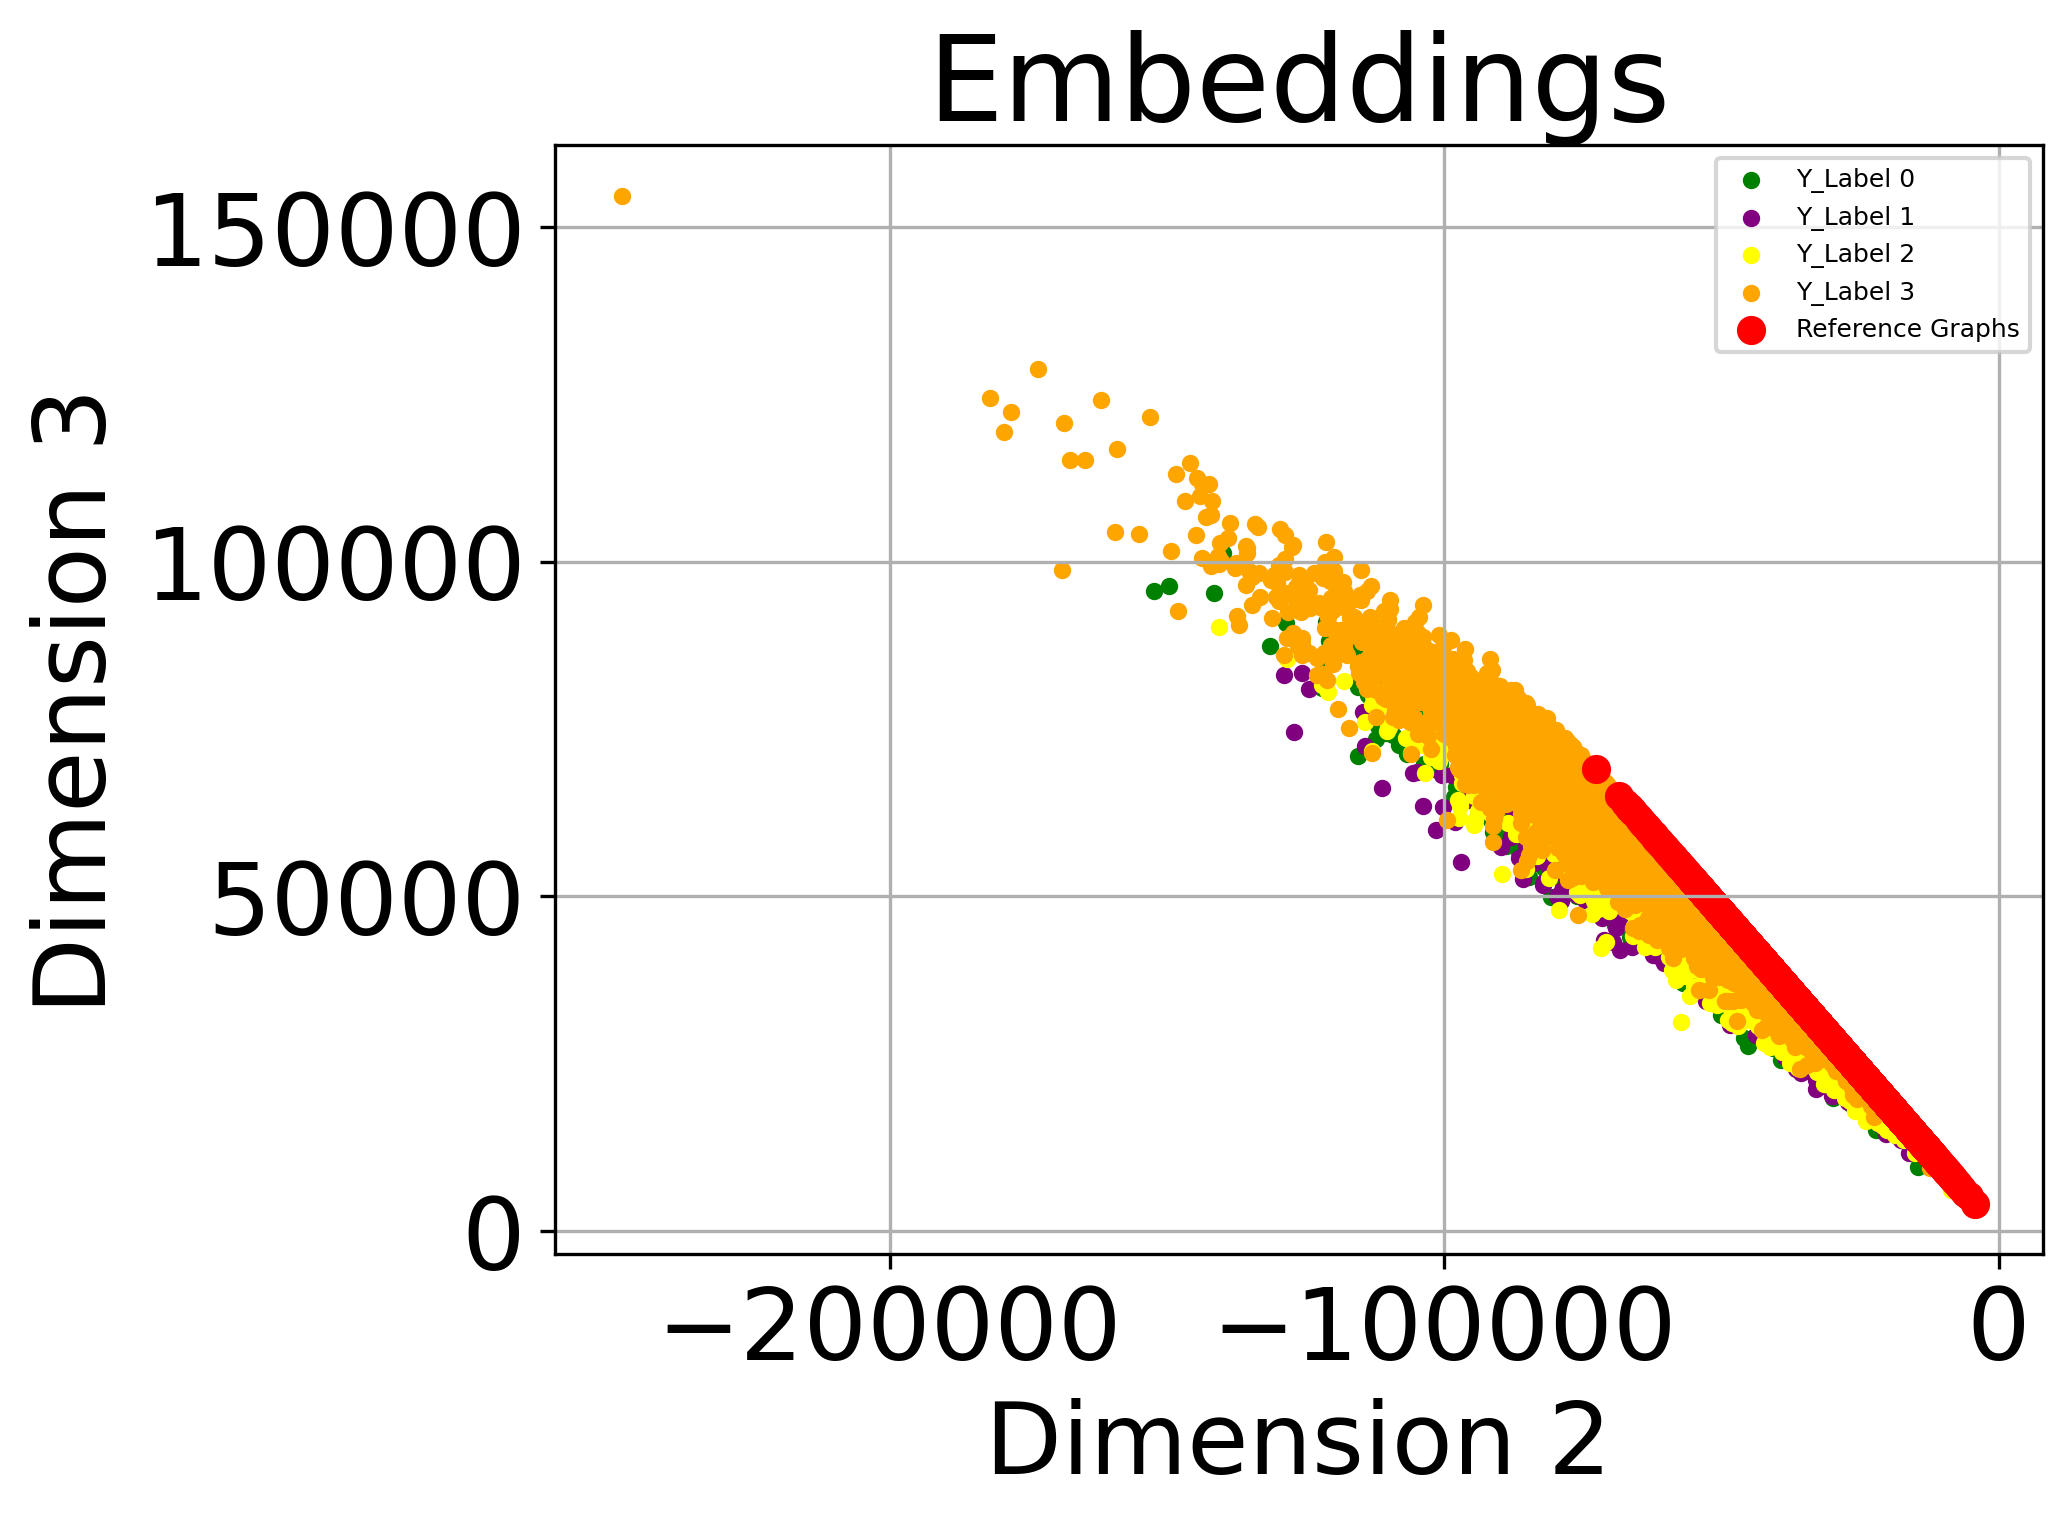

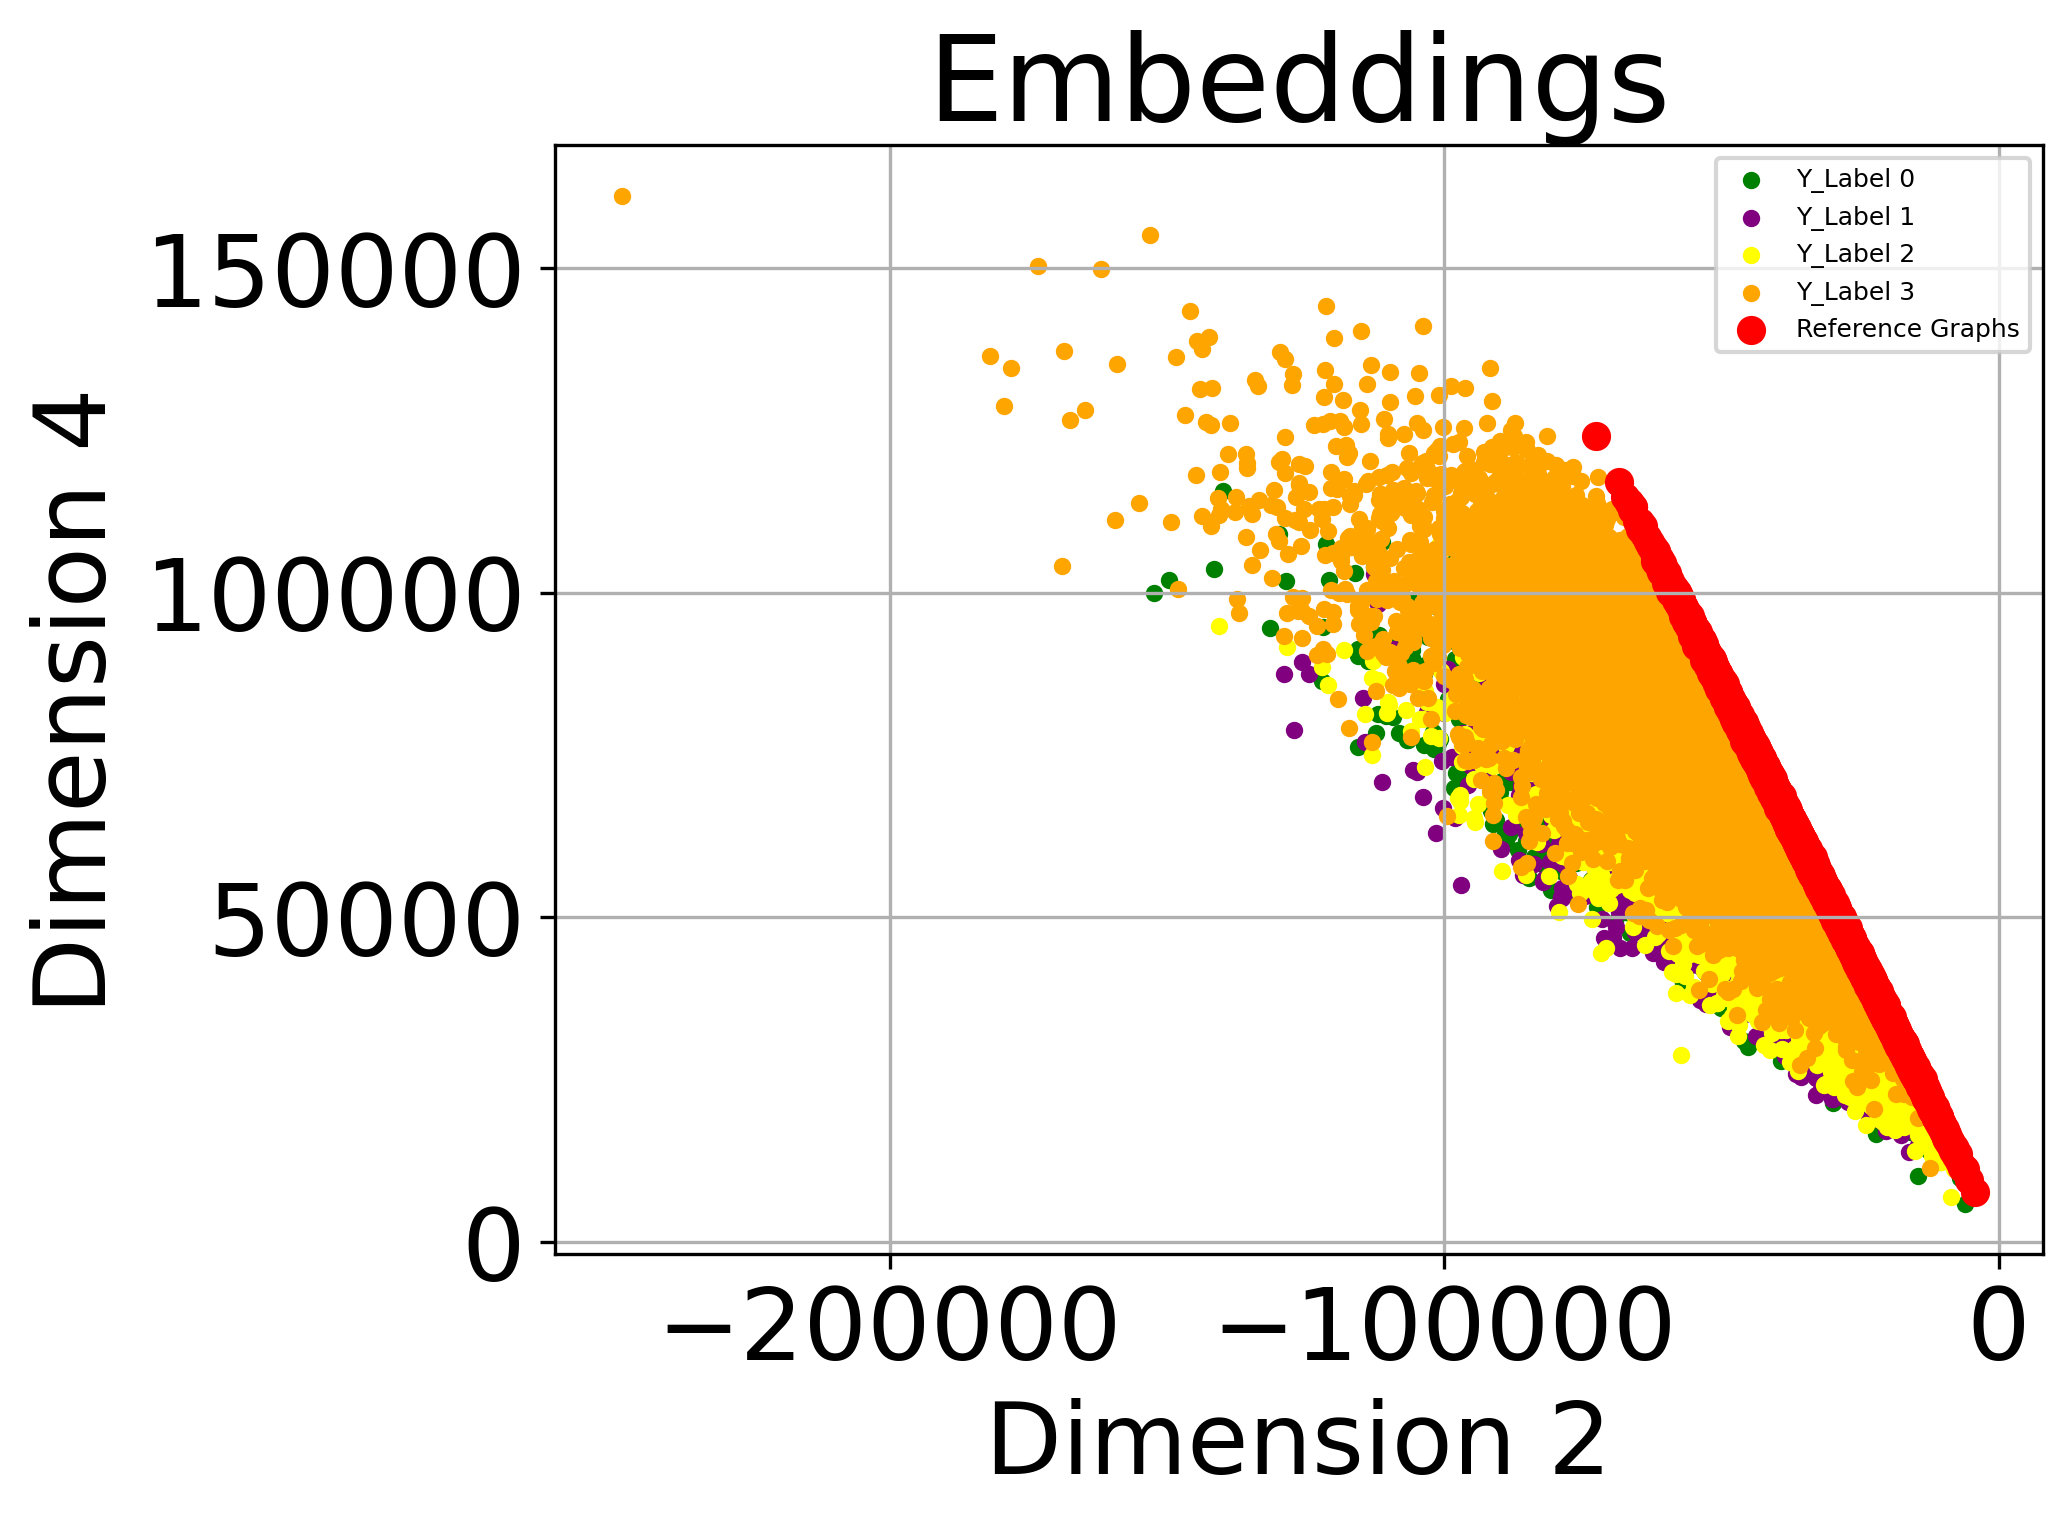

Selected Data: [Data(x=[14, 1], edge_index=[2, 42], y=[1]), Data(x=[17, 1], edge_index=[2, 46], y=[1]), Data(x=[15, 1], edge_index=[2, 44], y=[1]), Data(x=[15, 1], edge_index=[2, 48], y=[1]), Data(x=[18, 1], edge_index=[2, 50], y=[1]), Data(x=[15, 1], edge_index=[2, 44], y=[1]), Data(x=[20, 1], edge_index=[2, 60], y=[1]), Data(x=[16, 1], edge_index=[2, 46], y=[1]), Data(x=[18, 1], edge_index=[2, 48], y=[1]), Data(x=[18, 1], edge_index=[2, 46], y=[1]), Data(x=[17, 1], edge_index=[2, 48], y=[1]), Data(x=[16, 1], edge_index=[2, 44], y=[1]), Data(x=[18, 1], edge_index=[2, 46], y=[1]), Data(x=[18, 1], edge_index=[2, 52], y=[1]), Data(x=[20, 1], edge_index=[2, 56], y=[1]), Data(x=[14, 1], edge_index=[2, 40], y=[1]), Data(x=[17, 1], edge_index=[2, 50], y=[1]), Data(x=[19, 1], edge_index=[2, 50], y=[1]), Data(x=[17, 1], edge_index=[2, 52], y=[1]), Data(x=[17, 1], edge_index=[2, 54], y=[1]), Data(x=[21, 1], edge_index=[2, 68], y=[1]), Data(x=[17, 1], edge_index=[2, 52], y=[1]), Data(x=[19, 1], 

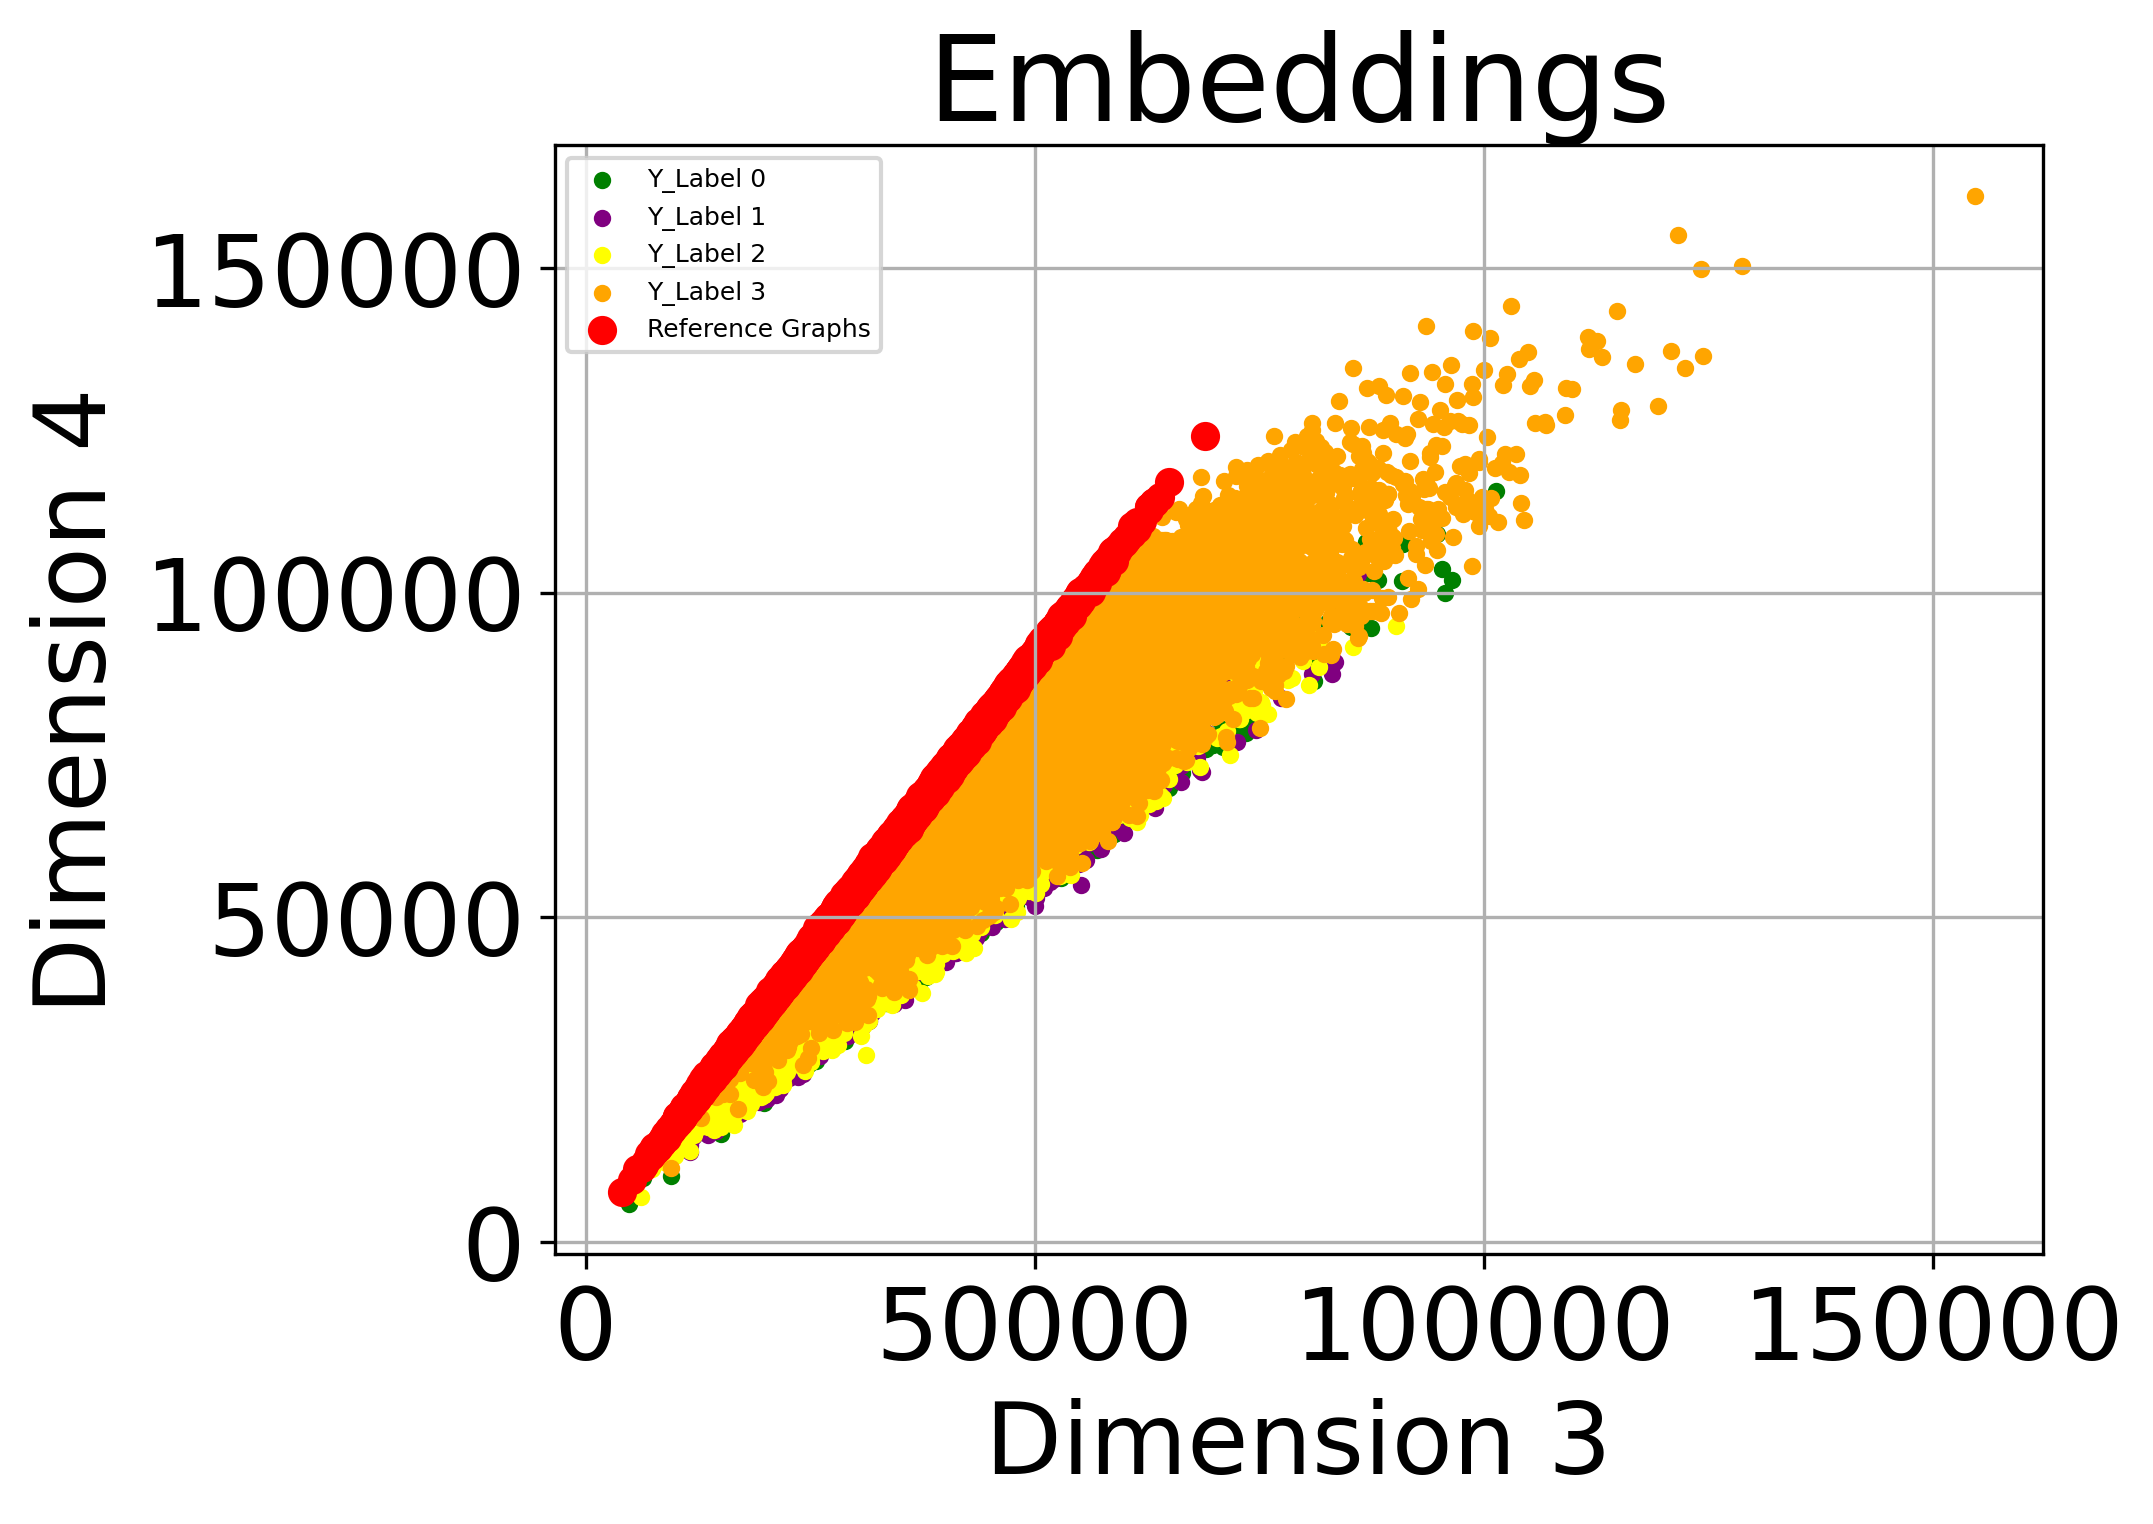

In [516]:
for label_idx in np.unique(labels):
    plt.scatter(embeddings_out[labels[1::2] == label_idx, :, 0],
                embeddings_out[labels[1::2] == label_idx, :, 1],
                color = color_dict[label_idx],
                label=f'Y_Label {label_idx}',
                s = 10)

# Scatter plot for embedding_out (colored by labels)
plt.scatter(embeddings_out_reference[::2, :, 0],
                embeddings_out_reference[::2, :, 1],
                color = 'red',
                label= "Reference Graphs")

plt.title('Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(fontsize = 6)
plt.grid(True)
plt.show()



for label_idx in np.unique(labels):
    plt.scatter(embeddings_out[labels[1::2] == label_idx, :, 0],
                embeddings_out[labels[1::2] == label_idx, :, 2],
                color = color_dict[label_idx],
                label=f'Y_Label {label_idx}',
                s = 10)

# Scatter plot for embedding_out (colored by labels)
plt.scatter(embeddings_out_reference[::2, :, 0],
                embeddings_out_reference[::2, :, 2],
                color = 'red',
                label= "Reference Graphs")

plt.title('Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 3')
plt.legend(fontsize = 6)
plt.grid(True)
plt.show()




for label_idx in np.unique(labels):
    plt.scatter(embeddings_out[labels[1::2] == label_idx, :, 0],
                embeddings_out[labels[1::2] == label_idx, :, 3],
                color = color_dict[label_idx],
                label=f'Y_Label {label_idx}',
                s = 10)

# Scatter plot for embedding_out (colored by labels)
plt.scatter(embeddings_out_reference[::2, :, 0],
                embeddings_out_reference[::2, :, 3],
                color = 'red',
                label= "Reference Graphs")

plt.title('Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 4')
plt.legend(fontsize = 6)
plt.grid(True)
plt.show()



for label_idx in np.unique(labels):
    plt.scatter(embeddings_out[labels[1::2] == label_idx, :, 1],
                embeddings_out[labels[1::2] == label_idx, :, 2],
                color = color_dict[label_idx],
                label=f'Y_Label {label_idx}',
                s = 10)

# Scatter plot for embedding_out (colored by labels)
plt.scatter(embeddings_out_reference[::2, :, 1],
                embeddings_out_reference[::2, :, 2],
                color = 'red',
                label= "Reference Graphs")

plt.title('Embeddings')
plt.xlabel('Dimension 2')
plt.ylabel('Dimension 3')
plt.legend(fontsize = 6)
plt.grid(True)
plt.show()


for label_idx in np.unique(labels):
    plt.scatter(embeddings_out[labels[1::2] == label_idx, :, 1],
                embeddings_out[labels[1::2] == label_idx, :, 3],
                color = color_dict[label_idx],
                label=f'Y_Label {label_idx}',
                s = 10)

# Scatter plot for embedding_out (colored by labels)
plt.scatter(embeddings_out_reference[::2, :, 1],
                embeddings_out_reference[::2, :, 3],
                color = 'red',
                label= "Reference Graphs")

plt.title('Embeddings')
plt.xlabel('Dimension 2')
plt.ylabel('Dimension 4')
plt.legend(fontsize = 6)
plt.grid(True)
plt.show()

# Process the selected data
print("Selected Data:", selected)

for label_idx in np.unique(labels):
    plt.scatter(embeddings_out[labels[1::2] == label_idx, :, 2],
                embeddings_out[labels[1::2] == label_idx, :, 3],
                color = color_dict[label_idx],
                label=f'Y_Label {label_idx}',
                s = 10)

# Scatter plot for embedding_out (colored by labels)
plt.scatter(embeddings_out_reference[::2, :, 2],
                embeddings_out_reference[::2, :, 3],
                color = 'red',
                label= "Reference Graphs")

plt.title('Embeddings')
plt.xlabel('Dimension 3')
plt.ylabel('Dimension 4')
plt.legend(fontsize = 6)
plt.grid(True)
plt.show()

In [517]:
dataset = selected

In [518]:
print(len(dataset))
dataset = MyCustomDataset(dataset).shuffle()


161


Processing...
Done!


In [519]:
from torch_geometric.loader import DataLoader
# Create training, validation, and test sets
print(dataset[10])
train_dataset = dataset[:int(len(dataset)*0.8)]
val_dataset   = dataset[int(len(dataset)*0.8):int(len(dataset)*0.9)]
test_dataset  = dataset[int(len(dataset)*0.9):]

print(f'Training set   = {len(train_dataset)} graphs')
print(f'Validation set = {len(val_dataset)} graphs')
print(f'Test set       = {len(test_dataset)} graphs')

# Create mini-batches
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print('\nTrain loader:')
for i, subgraph in enumerate(train_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nValidation loader:')
for i, subgraph in enumerate(val_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nTest loader:')
for i, subgraph in enumerate(test_loader):
    print(f' - Subgraph {i}: {subgraph}')

Data(x=[20, 1], edge_index=[2, 60], y=[1])
Training set   = 128 graphs
Validation set = 16 graphs
Test set       = 17 graphs

Train loader:
 - Subgraph 0: DataBatch(x=[1065, 1], edge_index=[2, 3104], y=[64], batch=[1065], ptr=[65])
 - Subgraph 1: DataBatch(x=[1066, 1], edge_index=[2, 3114], y=[64], batch=[1066], ptr=[65])

Validation loader:
 - Subgraph 0: DataBatch(x=[272, 1], edge_index=[2, 808], y=[16], batch=[272], ptr=[17])

Test loader:
 - Subgraph 0: DataBatch(x=[281, 1], edge_index=[2, 806], y=[17], batch=[281], ptr=[18])


In [520]:
import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
from torch_geometric.nn import GCNConv, GINConv
from torch_geometric.nn import global_mean_pool, global_add_pool


class GCN(torch.nn.Module):
    """GCN"""
    def __init__(self, dim_h):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, dim_h)
        self.conv2 = GCNConv(dim_h, dim_h)
        self.conv3 = GCNConv(dim_h, dim_h)
        self.lin = Linear(dim_h, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # Node embeddings
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()
        h = self.conv3(h, edge_index)

        # Graph-level readout
        hG = global_mean_pool(h, batch)

        # Classifier
        h = F.dropout(hG, p=0.5, training=self.training)
        h = self.lin(h)

        return hG, F.log_softmax(h, dim=1)

class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(dataset.num_node_features, dim_h),
                       BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.lin1 = Linear(dim_h*3, dim_h*3)
        self.lin2 = Linear(dim_h*3, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # Node embeddings
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Classifier
        h = self.lin1(h)
        h = h.relu()
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)

        return h, F.log_softmax(h, dim=1)

#gcn = GCN(dim_h=32)
gin = GIN(dim_h=32)

In [521]:

def train(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),
                                      lr=0.01,
                                      weight_decay=0.01)
    epochs = 50

    model.train()
    for epoch in range(epochs+1):
        #print(epoch)
        total_loss = 0
        acc = 0
        val_loss = 0
        val_acc = 0

        # Train on batches
        for data in loader:
          optimizer.zero_grad()
          _, out = model(data.x, data.edge_index, data.batch)
          loss = criterion(out, data.y)
          total_loss += loss / len(loader)
          acc += accuracy(out.argmax(dim=1), data.y) / len(loader)
          loss.backward()
          optimizer.step()

          # Validation
          val_loss, val_acc = test(model, val_loader)

          # print per epoch to see if the accuracy goes up!
        print(f'Epoch {epoch:>0} | Train Loss: {total_loss:.2f} '
            f'| Train Acc: {acc*100:>5.2f}% '
            f'| Val Loss: {val_loss:.2f} '
            f'| Val Acc: {val_acc*100:.2f}%')


    test_loss, test_acc = test(model, test_loader)
    print(f'Test Loss: {test_loss:.2f} | Test Acc: {test_acc*100:.2f}%')

    return model

@torch.no_grad()
def test(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    model.eval()
    loss = 0
    acc = 0

    for data in loader:
        _, out = model(data.x, data.edge_index, data.batch)
        loss += criterion(out, data.y) / len(loader)
        acc += accuracy(out.argmax(dim=1), data.y) / len(loader)

    return loss, acc

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

#gcn = train(gcn, train_loader)
gin = train(gin, train_loader)

Epoch 0 | Train Loss: 87.83 | Train Acc: 39.06% | Val Loss: 30.31 | Val Acc: 6.25%
Epoch 1 | Train Loss: 15.70 | Train Acc: 35.94% | Val Loss: 2.08 | Val Acc: 62.50%
Epoch 2 | Train Loss: 2.42 | Train Acc: 43.75% | Val Loss: 1.64 | Val Acc: 62.50%
Epoch 3 | Train Loss: 1.66 | Train Acc: 69.53% | Val Loss: 2.06 | Val Acc: 62.50%
Epoch 4 | Train Loss: 1.69 | Train Acc: 69.53% | Val Loss: 1.10 | Val Acc: 56.25%
Epoch 5 | Train Loss: 1.02 | Train Acc: 67.19% | Val Loss: 2.04 | Val Acc: 6.25%
Epoch 6 | Train Loss: 1.62 | Train Acc: 41.41% | Val Loss: 1.65 | Val Acc: 62.50%
Epoch 7 | Train Loss: 1.47 | Train Acc: 69.53% | Val Loss: 1.74 | Val Acc: 31.25%
Epoch 8 | Train Loss: 1.77 | Train Acc: 42.97% | Val Loss: 1.67 | Val Acc: 62.50%
Epoch 9 | Train Loss: 1.67 | Train Acc: 69.53% | Val Loss: 1.61 | Val Acc: 62.50%
Epoch 10 | Train Loss: 1.34 | Train Acc: 69.53% | Val Loss: 1.04 | Val Acc: 62.50%
Epoch 11 | Train Loss: 1.00 | Train Acc: 69.53% | Val Loss: 1.03 | Val Acc: 62.50%
Epoch 12 | Tr

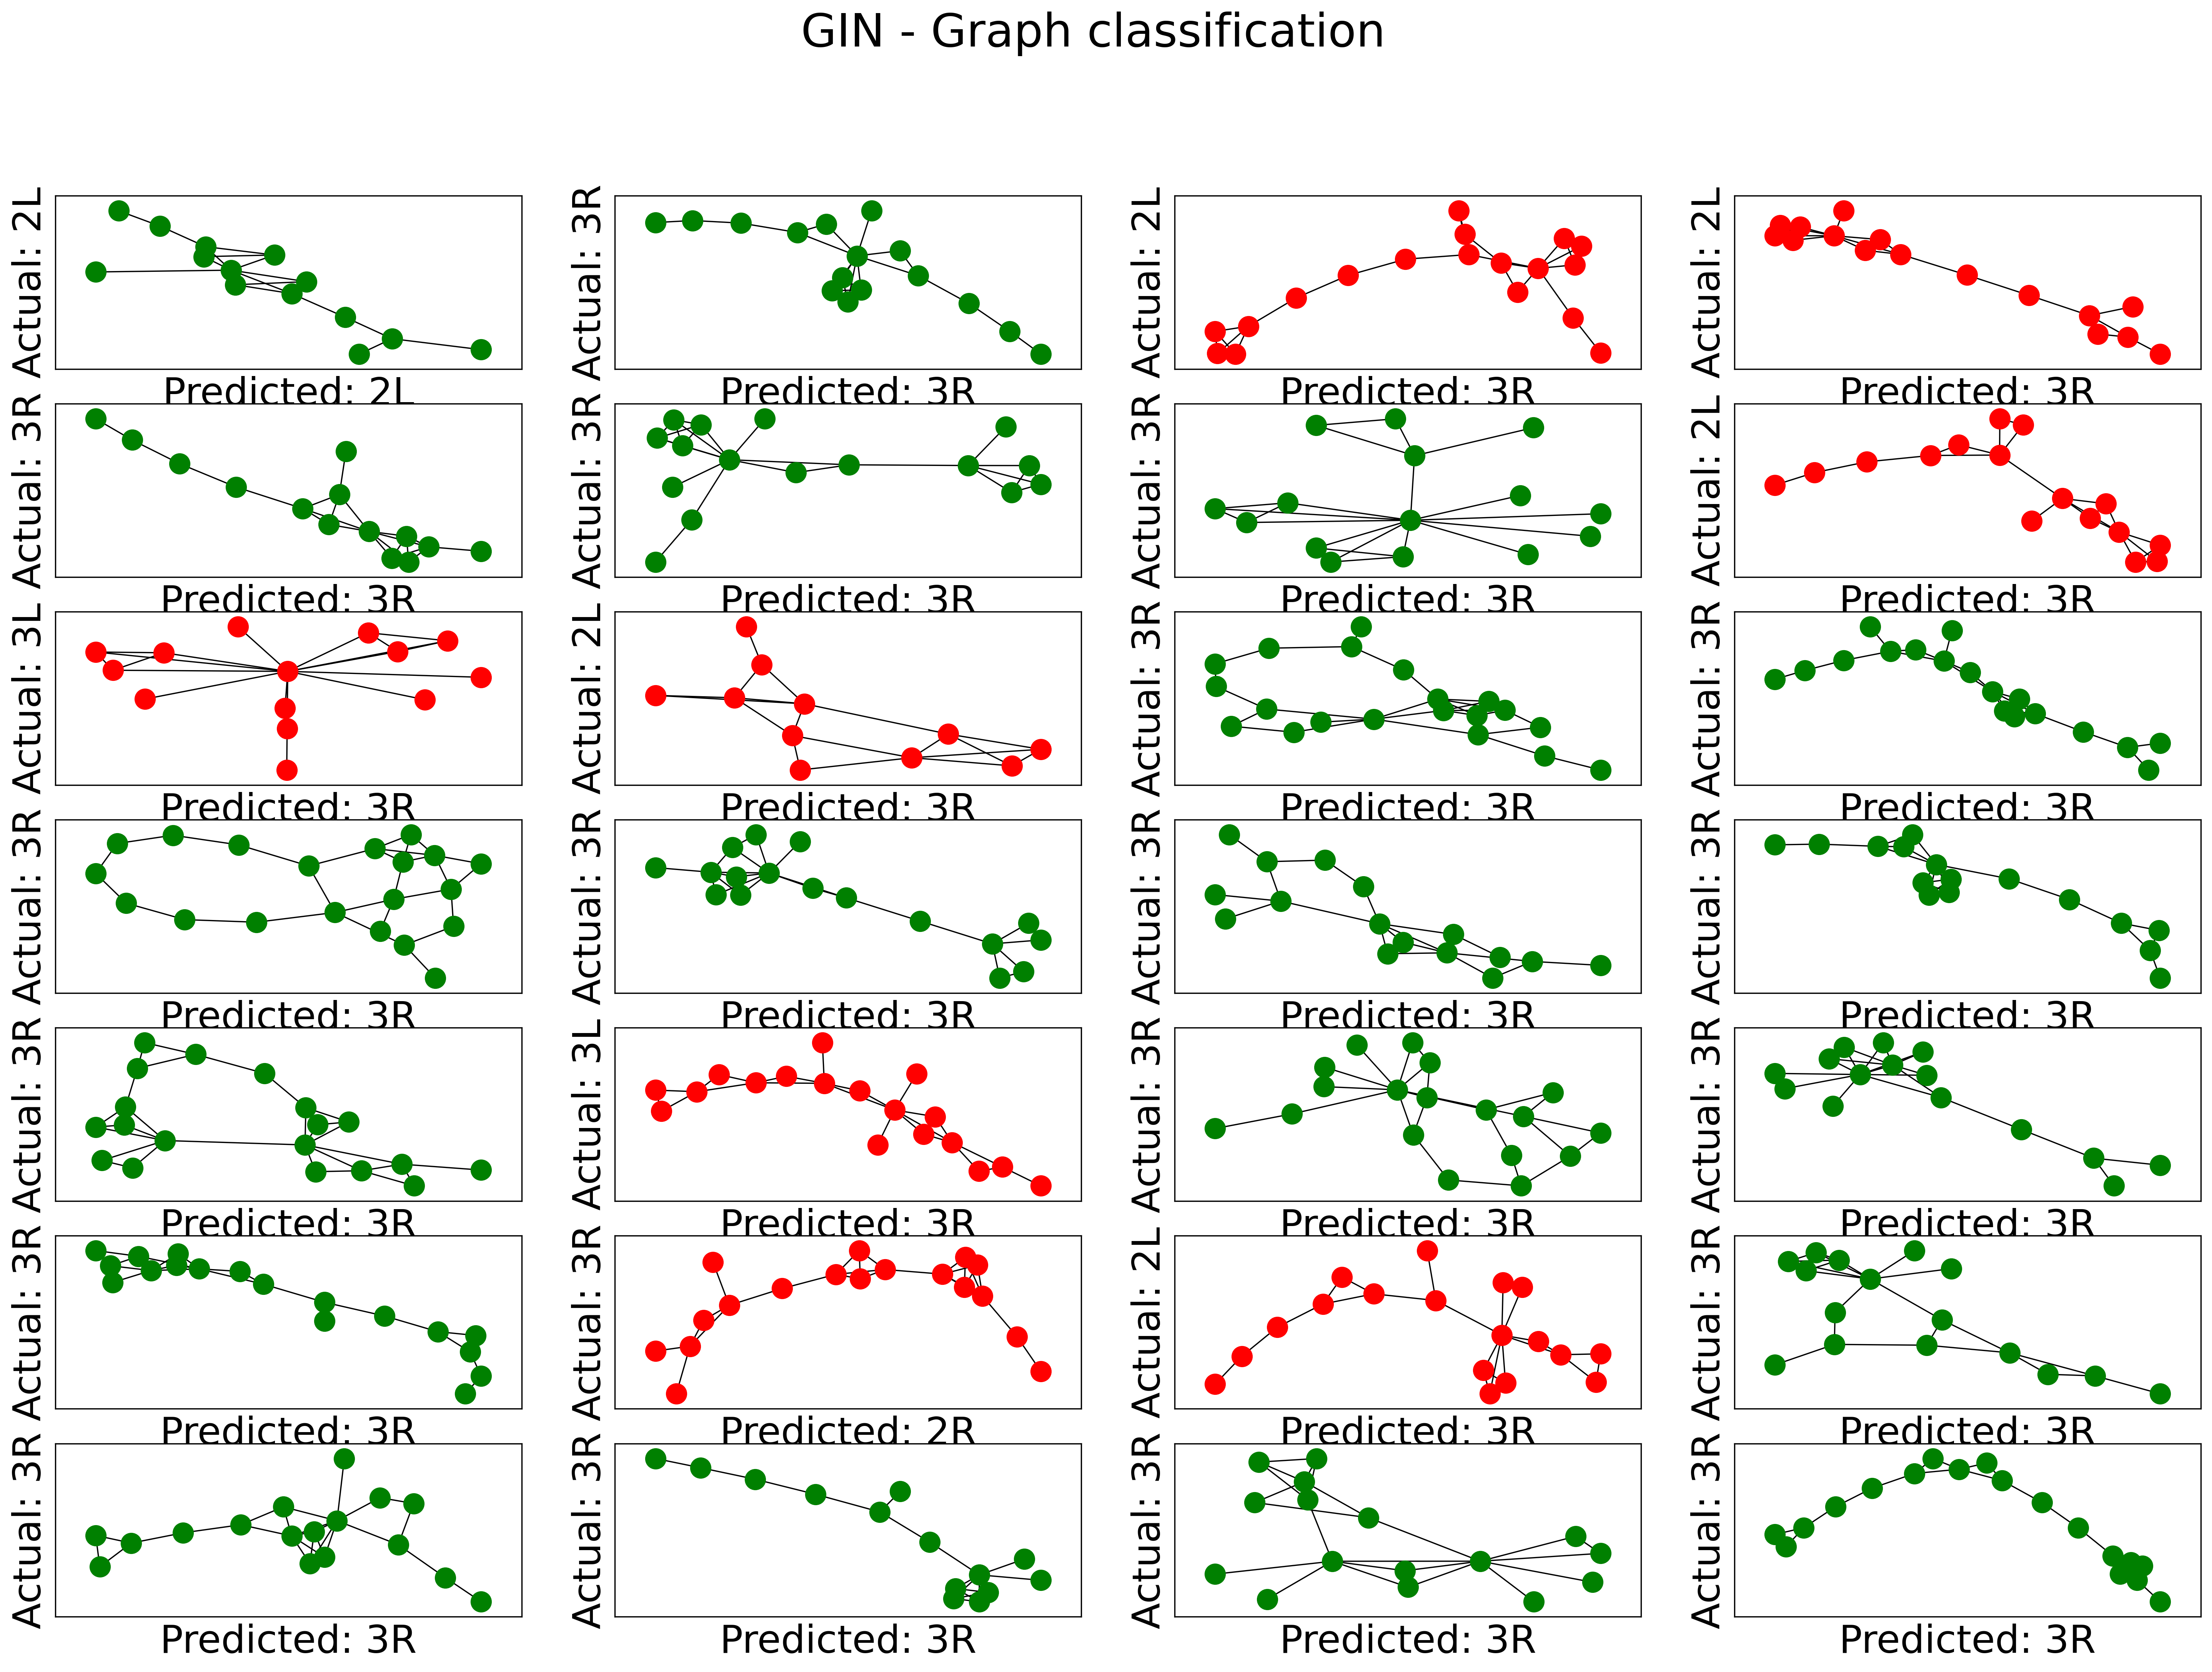

In [529]:
fig, ax = plt.subplots(7, 4, figsize=(24,16))
fig.suptitle('GIN - Graph classification')
lookup = {0: "2L", 1: "2R", 2: "3L", 3: "3R"}

for i, data in enumerate(dataset[len(dataset) - 28:len(dataset)]):
    # Calculate color (green if correct, red otherwise)
    _, out = gin(data.x, data.edge_index, data.batch)
    #color = "green" # set default color to green
    #if (out.argmax(dim = 1) != data.y):
    # 2L = 0; 2R = 1; 3L = 2, 3R = 3

    color = "green" if out.argmax(dim=1) == data.y else "red"

    # Plot graph
    ix = np.unravel_index(i, ax.shape)
    predicted = out.argmax(dim = 1).numpy()[0]
    actual = data.y.numpy()[0]
    ax[ix].axis('on')
    ax[ix].set_xlabel("Predicted: " + lookup[predicted])
    ax[ix].set_ylabel("Actual: " + lookup[actual])
    G = to_networkx(dataset[i], to_undirected=True)
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=False,
                    node_size=150,
                    node_color=color,
                    width=0.8,
                    ax=ax[ix]
                    )

In [523]:
#gcn.eval()
gin.eval()
acc_gcn = 0
acc_gin = 0
acc = 0

for data in test_loader:
    # Get classifications
    #_, out_gcn = gcn(data.x, data.edge_index, data.batch)
    _, out_gin = gin(data.x, data.edge_index, data.batch)
    out = out_gin

    # Calculate accuracy scores
    #acc_gcn += accuracy(out_gcn.argmax(dim=1), data.y) / len(test_loader)
    acc_gin += accuracy(out_gin.argmax(dim=1), data.y) / len(test_loader)
    acc += accuracy(out.argmax(dim=1), data.y) / len(test_loader)

# Print results
#print(f'GCN accuracy:     {acc_gcn*100:.2f}%')
print(f'GIN accuracy:     {acc_gin*100:.2f}%')
#print(f'GCN+GIN accuracy: {acc*100:.2f}%')

placeholder = np.array([threshold_val, acc_gin])
print(placeholder)
accuracy_collector.append(placeholder)

GIN accuracy:     82.35%
[9.00000000e+04 8.23529422e-01]


In [524]:
print(accuracy_collector)


[array([5.0000000e+03, 5.1868427e-01]), array([1.00000000e+04, 5.04120617e-01]), array([2.00000000e+04, 5.37235605e-01]), array([3.000000e+04, 5.447938e-01]), array([3.50000000e+04, 5.69540511e-01]), array([4.00000000e+04, 6.12499997e-01]), array([5.00000000e+04, 5.88815793e-01]), array([5.50000000e+04, 6.11223121e-01]), array([6.00e+04, 6.25e-01]), array([6.50000000e+04, 6.57118052e-01]), array([7.00000000e+04, 6.77966118e-01]), array([9.00000000e+04, 8.23529422e-01])]


In [526]:
print(len(accuracy_collector))

12


The following are placeholder logics

In [525]:
# [array([5.0000000e+03, 5.1868427e-01]), array([1.00000000e+04, 5.04120617e-01]), array([2.00000000e+04, 5.37235605e-01]), array([3.000000e+04, 5.447938e-01]), array([3.50000000e+04, 5.69540511e-01]), array([4.00000000e+04, 6.12499997e-01]), array([5.00000000e+04, 5.88815793e-01]), array([5.50000000e+04, 6.11223121e-01]), array([6.00e+04, 6.25e-01]), array([6.50000000e+04, 6.57118052e-01]), array([7.00000000e+04, 6.77966118e-01]), array([9.00000000e+04, 8.23529422e-01])]


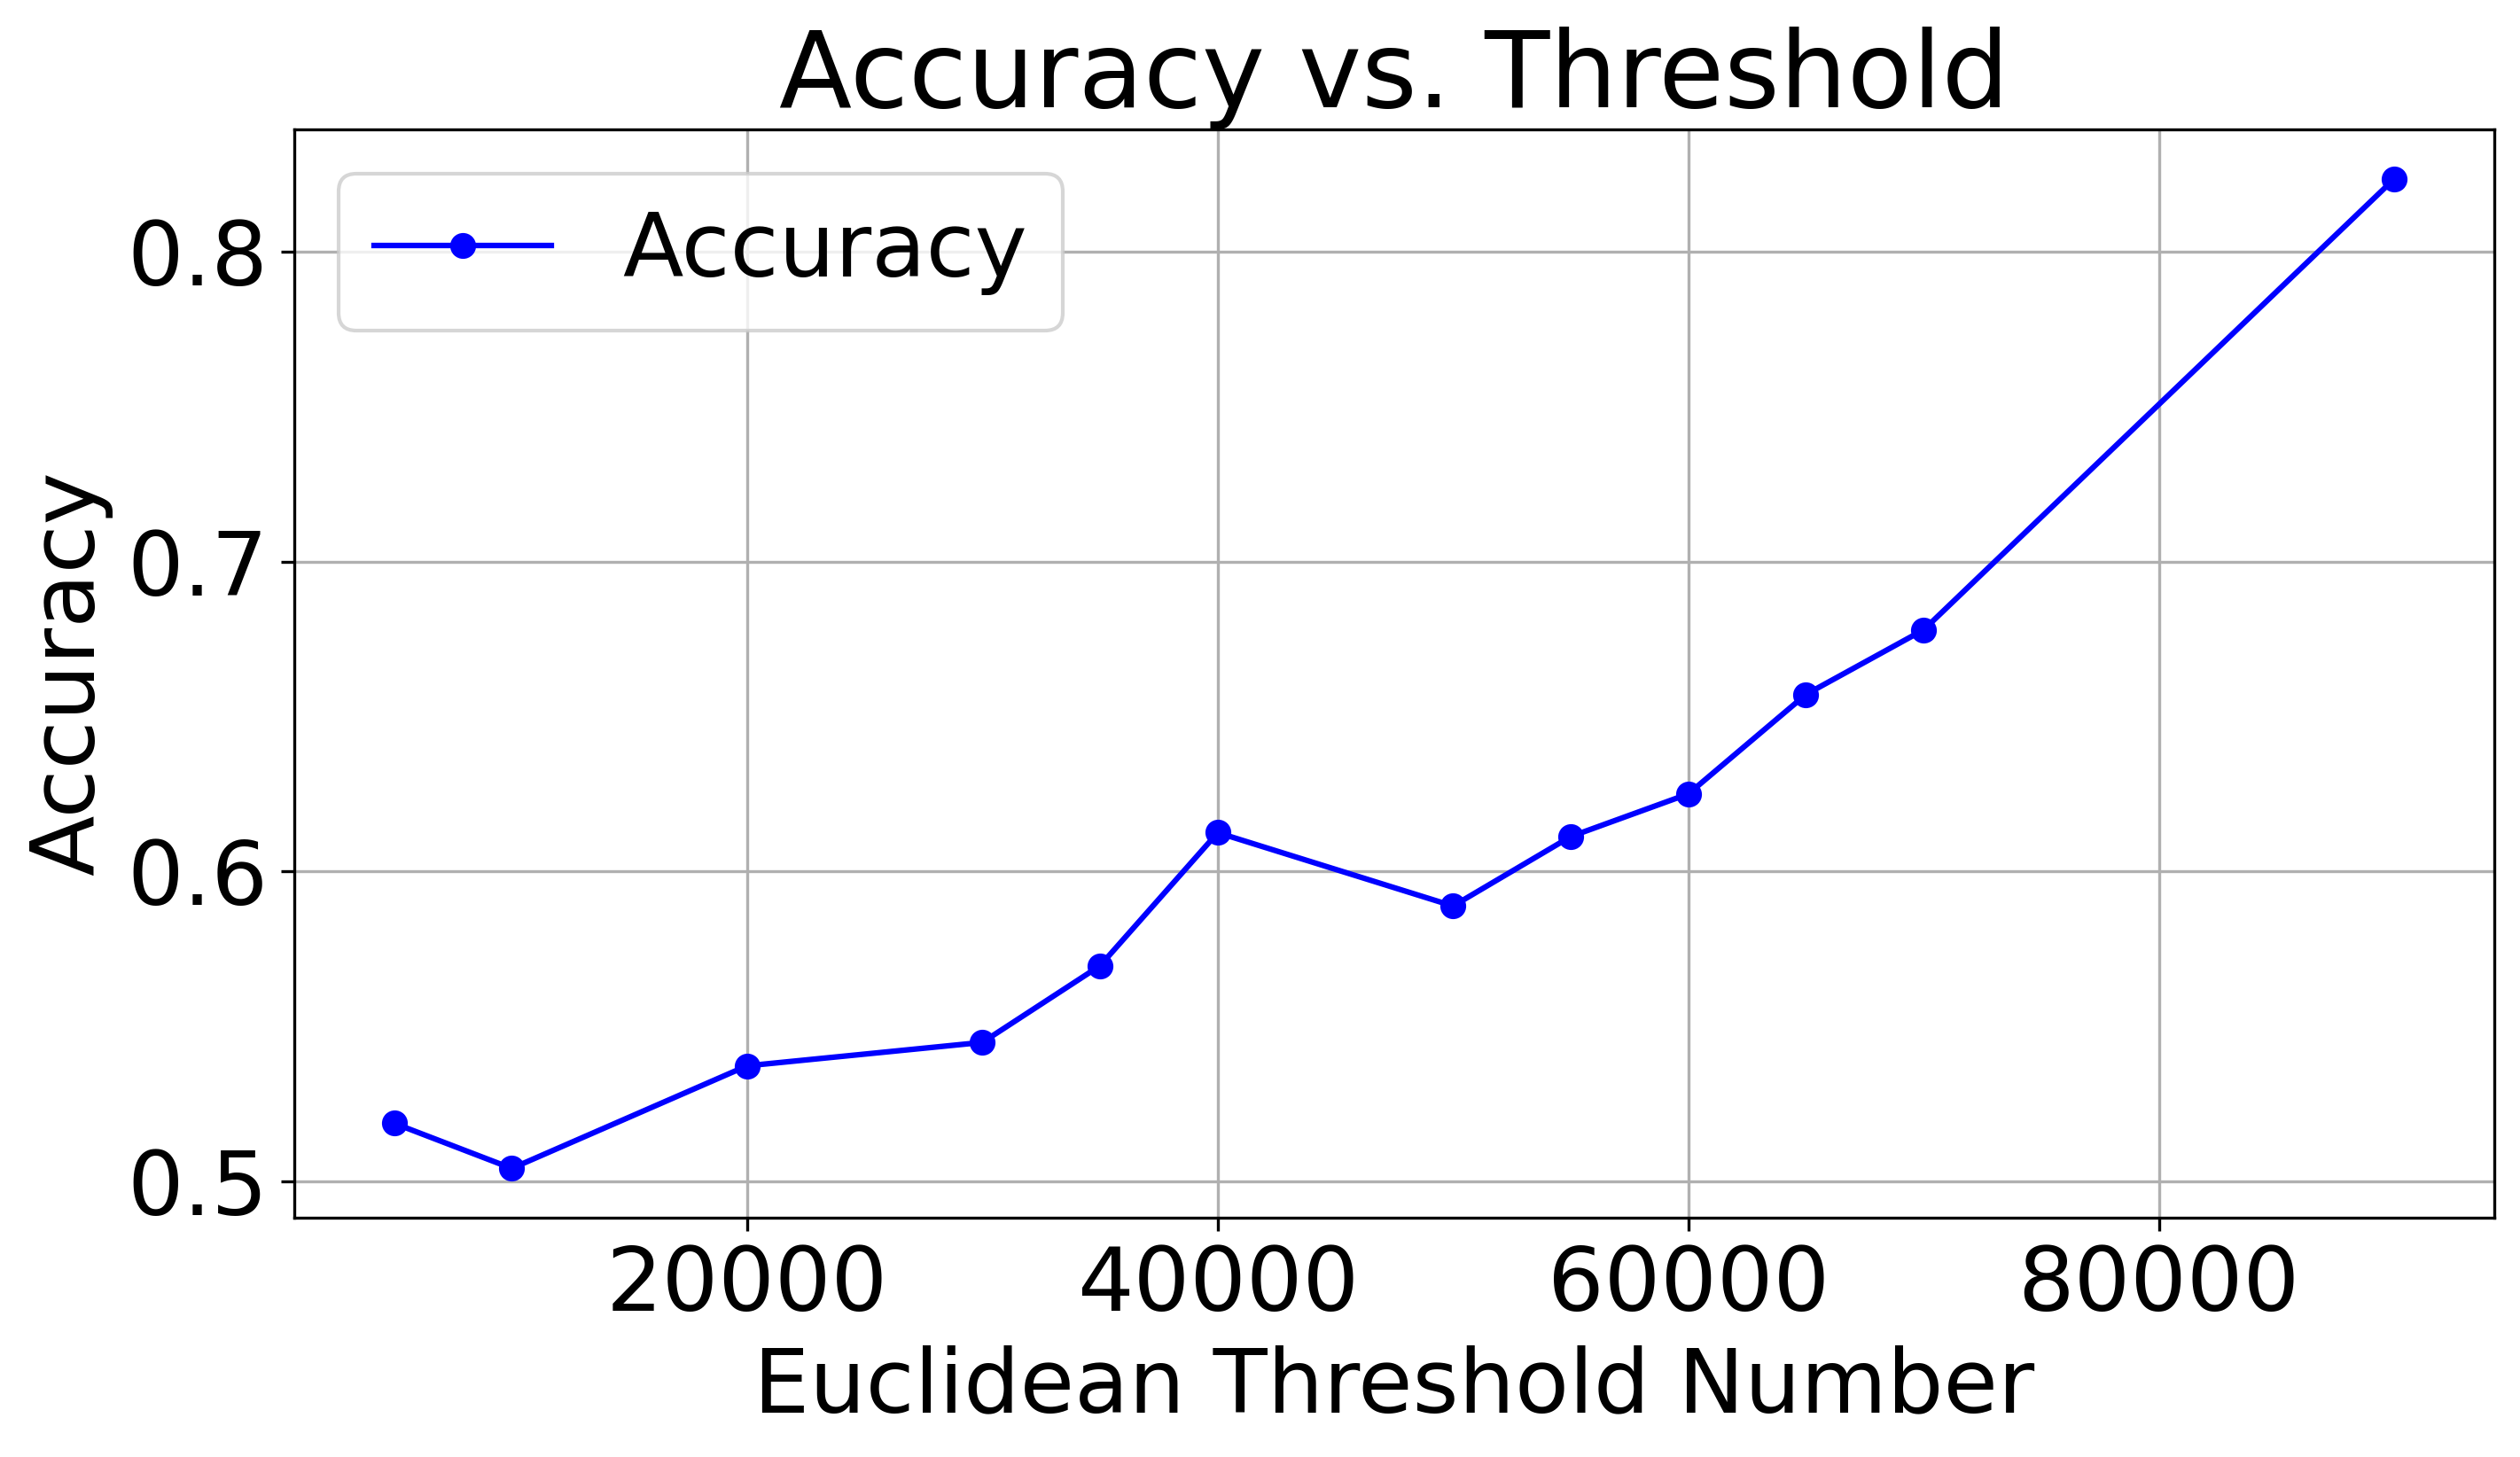

In [528]:
x_data = [entry[0] for entry in accuracy_collector]
y_data = [entry[1] for entry in accuracy_collector]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel('Euclidean Threshold Number')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#placeholder logics

import torch
from torch_geometric.data import Data, InMemoryDataset
from torch_geometric.utils import from_scipy_sparse_matrix
import scipy.sparse as sp
import numpy as np

class MyCustomDataset(InMemoryDataset):
    def __init__(self, data_list, transform=None, pre_transform=None):
        self.data_list = data_list
        super(MyCustomDataset, self).__init__(None, transform, pre_transform)
        self.data, self.slices = self.collate(data_list)

    @property
    def raw_file_names(self):
        return []

    @property
    def processed_file_names(self):
        return []

    def download(self):
        pass

    def process(self):
        pass

    def len(self):
        return len(self.data_list)

    def get(self, idx):
        return self.data_list[idx]


dataset = []
y = torch.ones_like(placeholder_dataset[0].y.long())

for graph in adjacency_matrix:
    sample = graph.reshape(21, 21)
    node_indices = torch.arange(sample.shape[0], dtype=torch.float).view(-1, 1)
    x = node_indices
    adj_matrix = sp.coo_matrix(sample)
    edge_index, edge_attr = from_scipy_sparse_matrix(adj_matrix)
    data = Data(x=x, edge_index=edge_index, y=torch.tensor(y, dtype=torch.float))
    dataset.append(data)

dataset = MyCustomDataset(dataset)

# Example: Accessing the first graph in the custom dataset
print(dataset[0])
print("Node feature matrix (x):")
print(dataset[0].x)
print("Edge index:")
print(dataset[0].edge_index)
print("Labels (y):")
print(dataset[0].y)
print(len(dataset))

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_scipy_sparse_matrix
import scipy.sparse as sp
from torch_geometric.datasets import TUDataset
# ex) x = [2,1000]
dataset = [] #should not use numpy list
y = np.ones((4,))
for graph in adjacency_matrix:
  sample = graph.reshape(21,21)
  node_indices = torch.arange(sample.shape[0], dtype = torch.float)
  x = torch.cat([node_indices])
  adj_matrix = sp.coo_matrix(sample)
  edge_index, edge_attr = from_scipy_sparse_matrix(adj_matrix)
  data = Data(x = x, edge_index = edge_index,y=y)
  dataset.append(data)
#this is a testing unit